# My first project - Pokemon Dataset

### It is possible to predict the Pokemon's generation using their stats?

_Steps_

We will use a well-know dataset imported from Kaggle. 

To begin with, we will do an EAD to identify basic statistics of our dataset to decide which columns' information we will use for our model.

Then we will create charts to visualize the final information.

Next, we will start to implement different ML algorithms to create our model.

Finally, we will test some metrics to identify the better ML algorithm to be used for our dataset.

In [ ]:
# In this section, we will import some useful libraries to our projet.
# As long as we go trought our project, we will be including more libraries.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from boruta import BorutaPy
from sklearn import metrics

# Columns description
In this section, I will describe what a column means using the reference in the following link:
[https://www.kaggle.com/datasets/maca11/all-pokemon-dataset]

---

## Description
+ Number: Number of the Pokemon in the National Pokedex
+ Name: Name of the Pokemon
+ Type 1: Primary Type of the Pokemon
+ Type 2: Secondary Type of the Pokemon
+ Abilities: A list that contains the abilities of the Pokemon
+ HP: Base Hit Points stat of the Pokemon
+ Att: Base Attack stat of the Pokemon
+ Def: Base Defense stat of the Pokemon
+ Spa: Base Special Attack stat of the Pokemon
+ Spd: Base Special Defense stat of the Pokemon
+ Spe: Base Speed stat of the Pokemon
+ BST: Sum of all the base stats
+ Mean: Mean of the base stats
+ Standard Deviation: Standard deviation of the base stats
+ Generation: The Generation in which the Pokemon was introduced
+ Experience Type: The Experience Group to which the Pokemon belongs
+ Experience to level 100: Amount of experience the Pokemon needs to level up to 100
+ Final Evolution: Denotes if the Pokemon is a Final Evolution
+ Catch Rate: Catch Rate of the Pokemon
+ Legendary: Denotes if the Pokemon is Legendary
+ Mega Evolution: Denotes if the Pokemon is a Mega Evolution
+ Alolan Form: Denotes if the Pokemon is an Alolan Form
+ Galarian Form: Denotes if the Pokemon is a Galarian Form
+ Against { }: Effectiveness of certain type against the Pokemon

### Exploratory Data Analysis

In [ ]:
#Importing the database
db = r"C:/Users/alvar/Downloads/All_Pokemon.csv"
data = pd.read_csv(db)
data.head()

Number           Name Type 1  Type 2                    Abilities  HP  Att  \
0       1      Bulbasaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  45   49   
1       2        Ivysaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  60   62   
2       3       Venusaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  80   82   
3       3  Mega Venusaur  Grass  Poison                ['Thick Fat']  80  100   
4       4     Charmander   Fire     NaN     ['Blaze', 'Solar Power']  39   52   

   Def  Spa  Spd  ...  Against Bug  Against Rock  Against Ghost  \
0   49   65   65  ...          1.0           1.0            1.0   
1   63   80   80  ...          1.0           1.0            1.0   
2   83  100  100  ...          1.0           1.0            1.0   
3  123  122  120  ...          1.0           1.0            1.0   
4   43   60   50  ...          0.5           2.0            1.0   

   Against Dragon  Against Dark Against Steel  Against Fairy  Height  Weight  \
0             1.0           1.0           1.0            0.5     0.7     6.9   
1             1.0           1.0           1.0            0.5     1.0    13.0   
2             1.0           1.0           1.0            0.5     2.0   100.0   
3             1.0           1.0           1.0            0.5     2.4   155.5   
4             1.0           1.0           0.5            0.5     0.6     8.5   

    BMI  
0  14.1  
1  13.0  
2  25.0  
3  27.0  
4  23.6  

[5 rows x 44 columns]

In [ ]:
row, col = data.shape
print("Total of columns : {}".format(col))
print("Total of rows : {}".format(row))

Total of columns : 44
Total of rows : 1032


In [ ]:
#Trying to identifie a null information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

Text(0.5, 1.0, 'Null Information Chart')

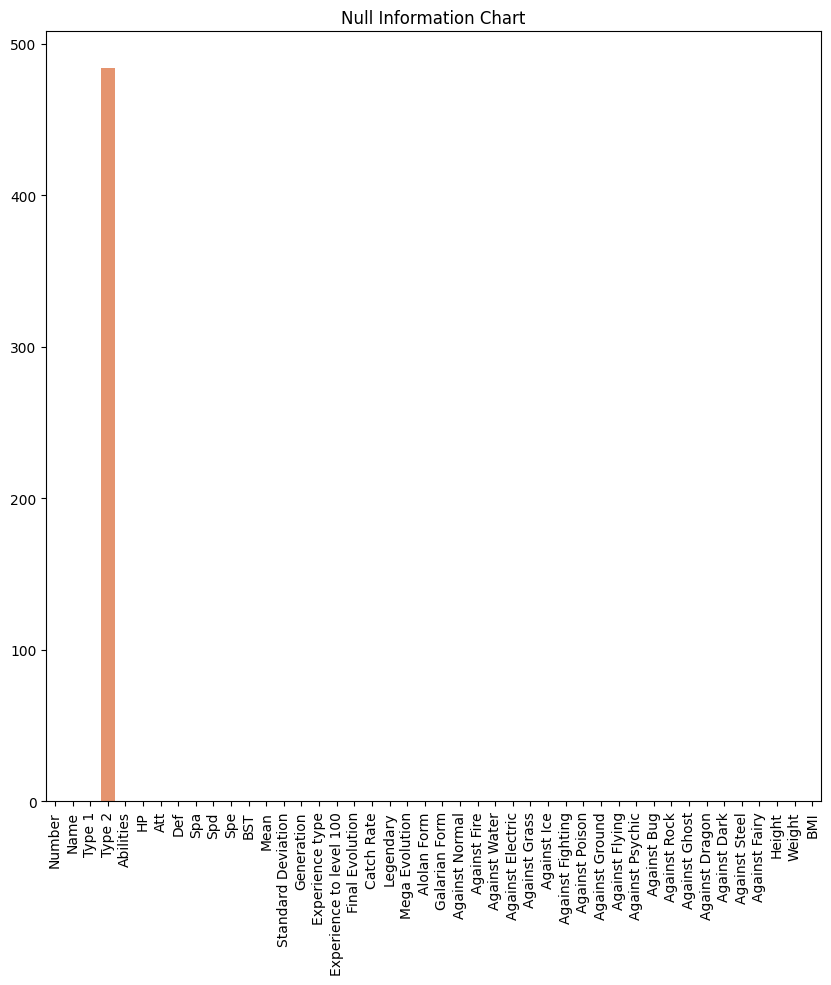

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(y = data.isna().sum(), x = data.columns)
plt.xticks(rotation = 90)
plt.title("Null Information Chart")

#Here we can see that Type2 (secondary Type) is a column that have null values, so we can delete it because it's no important for our model

In [ ]:
data.drop(labels = "Type 2", axis = "columns", inplace = True)

#### Now we will delete some columns that won't be important for our model

+ BST
+ Mean
+ Standard Deviation
+ Experience to level 100	
+ Height
+ Weight
+ BMI

All information, except experience to level 100, are calculations based on other columns.

In [ ]:
delcol = ["BST", "Mean", "Standard Deviation", "Experience to level 100", "Height", "Weight", "BMI"]
data.drop(labels = delcol, axis = "columns", inplace = True)

In [ ]:
data.describe().T

count        mean         std    min     25%    50%  \
Number            1032.0  439.226744  261.871350   1.00  211.75  434.5   
HP                1032.0   69.906008   26.189155   1.00   50.00   67.0   
Att               1032.0   80.526163   32.542374   5.00   55.00   78.0   
Def               1032.0   74.609496   30.905972   5.00   50.00   70.0   
Spa               1032.0   72.918605   32.773495  10.00   50.00   65.0   
Spd               1032.0   72.139535   27.625876  20.00   50.00   70.0   
Spe               1032.0   68.548450   30.219526   5.00   45.00   65.0   
Generation        1032.0    4.432171    2.263713   1.00    3.00    5.0   
Final Evolution   1032.0    0.564922    0.496008   0.00    0.00    1.0   
Catch Rate        1032.0   93.879845   76.316071   3.00   45.00   60.0   
Legendary         1032.0    0.121124    0.326430   0.00    0.00    0.0   
Mega Evolution    1032.0    0.048450    0.214818   0.00    0.00    0.0   
Alolan Form       1032.0    0.017442    0.130974   0.00    0.00    0.0   
Galarian Form     1032.0    0.019380    0.137923   0.00    0.00    0.0   
Against Normal    1032.0    0.867490    0.288087   0.00    1.00    1.0   
Against Fire      1032.0    1.147045    0.703754   0.25    0.50    1.0   
Against Water     1032.0    1.061289    0.607551   0.25    0.50    1.0   
Against Electric  1032.0    1.045785    0.635515   0.00    0.50    1.0   
Against Grass     1032.0    1.005814    0.748643   0.25    0.50    1.0   
Against Ice       1032.0    1.210514    0.759727   0.25    0.50    1.0   
Against Fighting  1032.0    1.074612    0.758243   0.00    0.50    1.0   
Against Poison    1032.0    0.956395    0.544938   0.00    0.50    1.0   
Against Ground    1032.0    1.128391    0.762139   0.00    1.00    1.0   
Against Flying    1032.0    1.171996    0.593650   0.25    1.00    1.0   
Against Psychic   1032.0    0.975533    0.500431   0.00    1.00    1.0   
Against Bug       1032.0    1.002180    0.613111   0.25    0.50    1.0   
Against Rock      1032.0    1.239826    0.699361   0.25    1.00    1.0   
Against Ghost     1032.0    1.025678    0.577269   0.00    1.00    1.0   
Against Dragon    1032.0    0.974806    0.378040   0.00    1.00    1.0   
Against Dark      1032.0    1.074855    0.475292   0.25    1.00    1.0   
Against Steel     1032.0    0.992006    0.511859   0.25    0.50    1.0   
Against Fairy     1032.0    1.094234    0.535159   0.25    1.00    1.0   

                     75%    max  
Number            667.25  898.0  
HP                 83.00  255.0  
Att               100.00  190.0  
Def                90.00  230.0  
Spa                95.00  194.0  
Spd                90.00  230.0  
Spe                90.00  200.0  
Generation          6.00    8.0  
Final Evolution     1.00    1.0  
Catch Rate        127.00  255.0  
Legendary           0.00    1.0  
Mega Evolution      0.00    1.0  
Alolan Form         0.00    1.0  
Galarian Form       0.00    1.0  
Against Normal      1.00    1.0  
Against Fire        2.00    4.0  
Against Water       1.00    4.0  
Against Electric    1.00    4.0  
Against Grass       1.00    4.0  
Against Ice         2.00    4.0  
Against Fighting    2.00    4.0  
Against Poison      1.00    4.0  
Against Ground      2.00    4.0  
Against Flying      1.00    4.0  
Against Psychic     1.00    4.0  
Against Bug         1.00    4.0  
Against Rock        2.00    4.0  
Against Ghost       1.00    4.0  
Against Dragon      1.00    2.0  
Against Dark        1.00    4.0  
Against Steel       1.00    4.0  
Against Fairy       1.00    4.0

In [ ]:
data.head()

Number           Name Type 1                    Abilities  HP  Att  Def  \
0       1      Bulbasaur  Grass  ['Chlorophyll', 'Overgrow']  45   49   49   
1       2        Ivysaur  Grass  ['Chlorophyll', 'Overgrow']  60   62   63   
2       3       Venusaur  Grass  ['Chlorophyll', 'Overgrow']  80   82   83   
3       3  Mega Venusaur  Grass                ['Thick Fat']  80  100  123   
4       4     Charmander   Fire     ['Blaze', 'Solar Power']  39   52   43   

   Spa  Spd  Spe  ...  Against Ground Against Flying  Against Psychic  \
0   65   65   45  ...             1.0            2.0              2.0   
1   80   80   60  ...             1.0            2.0              2.0   
2  100  100   80  ...             1.0            2.0              2.0   
3  122  120   80  ...             1.0            2.0              2.0   
4   60   50   65  ...             2.0            1.0              1.0   

   Against Bug  Against Rock  Against Ghost  Against Dragon  Against Dark  \
0          1.0           1.0            1.0             1.0           1.0   
1          1.0           1.0            1.0             1.0           1.0   
2          1.0           1.0            1.0             1.0           1.0   
3          1.0           1.0            1.0             1.0           1.0   
4          0.5           2.0            1.0             1.0           1.0   

   Against Steel  Against Fairy  
0            1.0            0.5  
1            1.0            0.5  
2            1.0            0.5  
3            1.0            0.5  
4            0.5            0.5  

[5 rows x 36 columns]

##### Principal abitily 
Here we will try to discover what are the most commom abilities in our dataset

c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Boxplot of TotalCountAbilities')

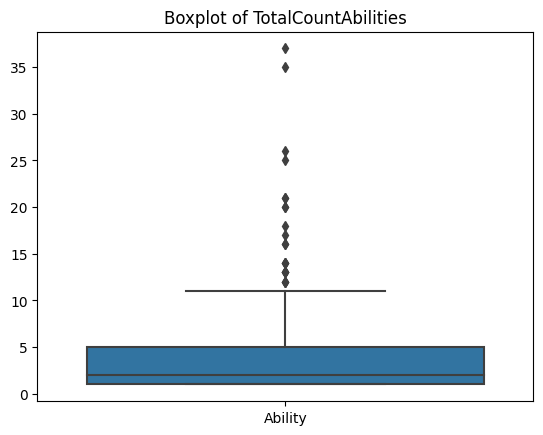

In [ ]:
abilities = data["Abilities"].apply(lambda x : pd.Series(x.replace("[","")))
abilities = abilities[0].apply(lambda x : pd.Series(x.replace("]","")))
abilities = abilities[0].apply(lambda x : pd.Series(x.split(",")))
abilities.rename(columns={0: "Ability"}, inplace = True)
abilities2 = pd.DataFrame(abilities["Ability"].value_counts())
sns.boxplot(abilities2)
plt.title("Boxplot of TotalCountAbilities")

#So the most commom abilities will be consider the "outliers" of our dataset

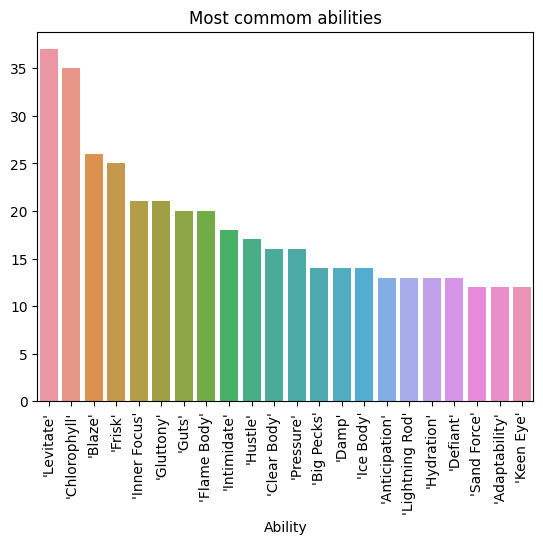

In [ ]:
abilities3 = abilities2[abilities2["Ability"] >= 12].reset_index()
sns.barplot(y = abilities3["Ability"], x = abilities3["index"])
plt.xticks(rotation = 90)
plt.title("Most commom abilities")
plt.xlabel("Ability")
plt.ylabel("")
plt.show()

#This doesn't look as a good variable to be considered in our model. So we will delete it.

In [ ]:
data.drop(labels = "Abilities", axis = "columns", inplace = True)

##### Now we will try to study the differents evolutions and forms in our dataset and decide the importance of them in our analysis

In [ ]:
evol_data = data[['Name', 'Type 1', "Generation", 'Experience type', 'Catch Rate', 'Final Evolution', 'Mega Evolution', 'Alolan Form', 'Galarian Form']]
evol_data.head()

Name Type 1  Generation Experience type  Catch Rate  \
0      Bulbasaur  Grass         1.0     Medium Slow          45   
1        Ivysaur  Grass         1.0     Medium Slow          45   
2       Venusaur  Grass         1.0     Medium Slow          45   
3  Mega Venusaur  Grass         6.0     Medium Slow          45   
4     Charmander   Fire         1.0     Medium Slow          45   

   Final Evolution  Mega Evolution  Alolan Form  Galarian Form  
0              0.0             0.0          0.0            0.0  
1              0.0             0.0          0.0            0.0  
2              1.0             0.0          0.0            0.0  
3              1.0             1.0          0.0            0.0  
4              0.0             0.0          0.0            0.0

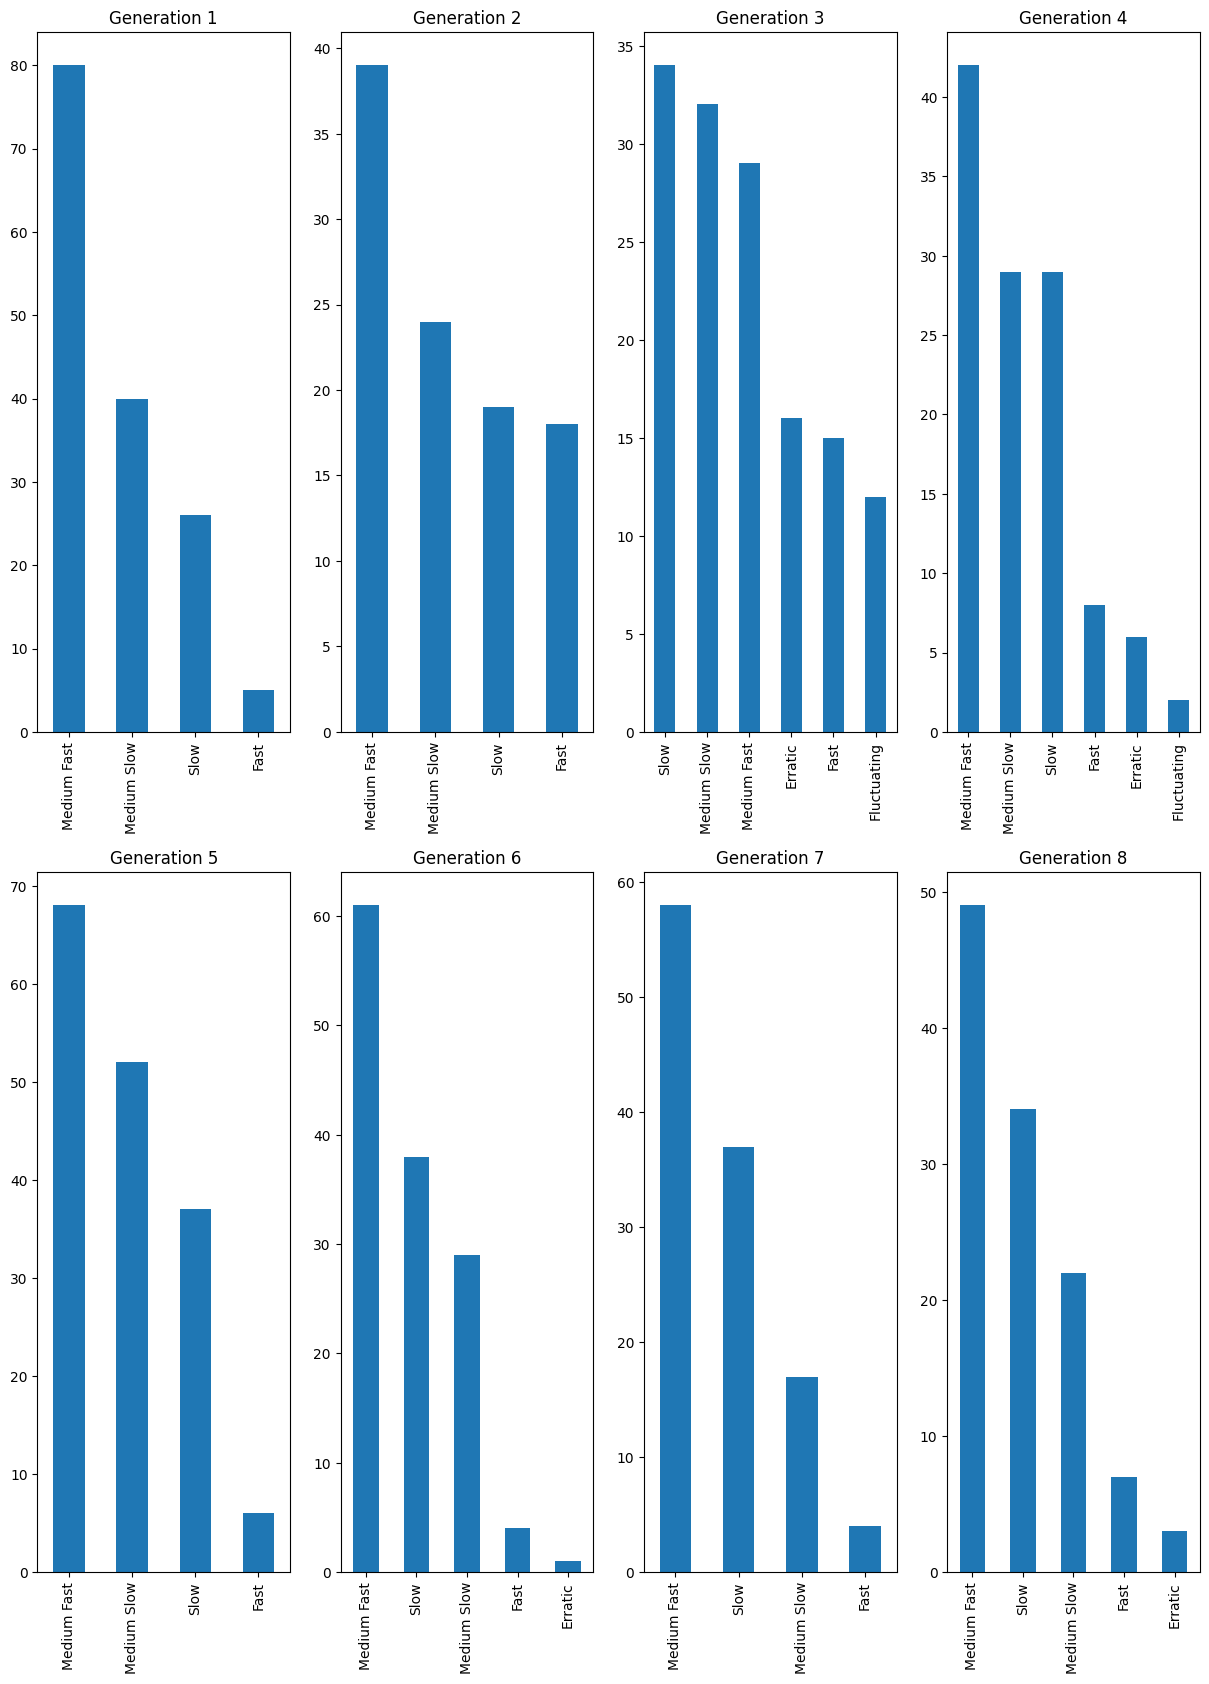

In [ ]:
plt.figure(figsize = (15, 20))
for i in range(1,len(data.Generation.unique())+1):
    plt.subplot(2, 4, i)
    evol_data.groupby("Generation")["Experience type"].value_counts()[i].plot(kind = "bar")
    plt.xticks(rotation = 90)
    plt.xlabel("")
    plt.title("Generation" + " " +str(i))

plt.show()

#Here we can see that Experience type is an information for more than one generation and because of the quantity of possibles dummies to be created, we
#won't use it for our dataset

In [ ]:
evol_data2 = data[['Name', 'Type 1', "Generation", 'Catch Rate', 'Final Evolution', 'Mega Evolution', 'Alolan Form', 'Galarian Form']]
evol_data2.head()

Name Type 1  Generation  Catch Rate  Final Evolution  \
0      Bulbasaur  Grass         1.0          45              0.0   
1        Ivysaur  Grass         1.0          45              0.0   
2       Venusaur  Grass         1.0          45              1.0   
3  Mega Venusaur  Grass         6.0          45              1.0   
4     Charmander   Fire         1.0          45              0.0   

   Mega Evolution  Alolan Form  Galarian Form  
0             0.0          0.0            0.0  
1             0.0          0.0            0.0  
2             0.0          0.0            0.0  
3             1.0          0.0            0.0  
4             0.0          0.0            0.0

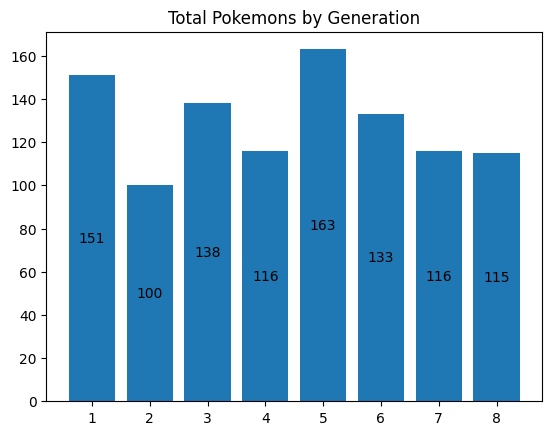

In [ ]:
generationdf = pd.DataFrame(evol_data2.Generation.value_counts()).reset_index()
generationplot = plt.bar(x = generationdf["index"], height = generationdf.Generation)
plt.bar_label(generationplot, labels = generationdf.Generation, label_type = "center")
plt.title("Total Pokemons by Generation")
plt.show()

In [ ]:
evol_data2 = data[["Generation", 'Experience type', 'Catch Rate', 'Final Evolution', 'Mega Evolution', 'Alolan Form', 'Galarian Form']]
for i in evol_data2.iloc[:, 3:]:
    print(evol_data2[i].value_counts())

1.0    583
0.0    449
Name: Final Evolution, dtype: int64
0.0    982
1.0     50
Name: Mega Evolution, dtype: int64
0.0    1014
1.0      18
Name: Alolan Form, dtype: int64
0.0    1012
1.0      20
Name: Galarian Form, dtype: int64


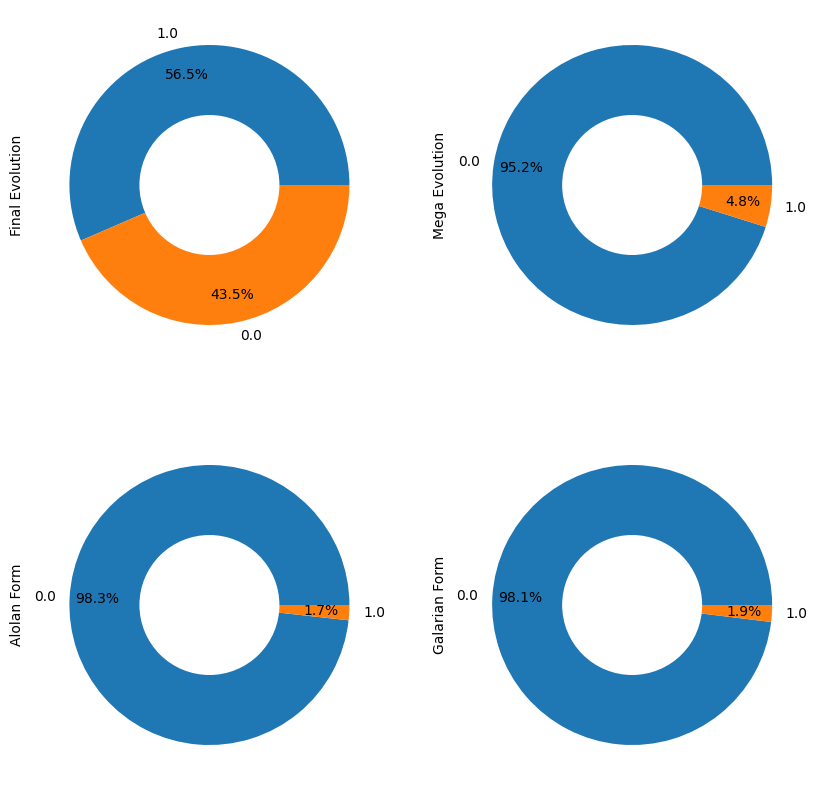

In [ ]:
#Here we will see if the differents evolutions/forms could be important for our model
plt.figure(figsize = (10, 10))
for i in range(3,7):
    plt.subplot(2, 2, i-2)
    Circle = evol_data2.iloc[: , i].value_counts().plot(kind = "pie", autopct = "%1.1f%%", pctdistance = 0.8 )
    centre_circle = plt.Circle((0.0, 0.0), 0.5, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

#Apparently, this classification will help our model to decide, also there are just two values

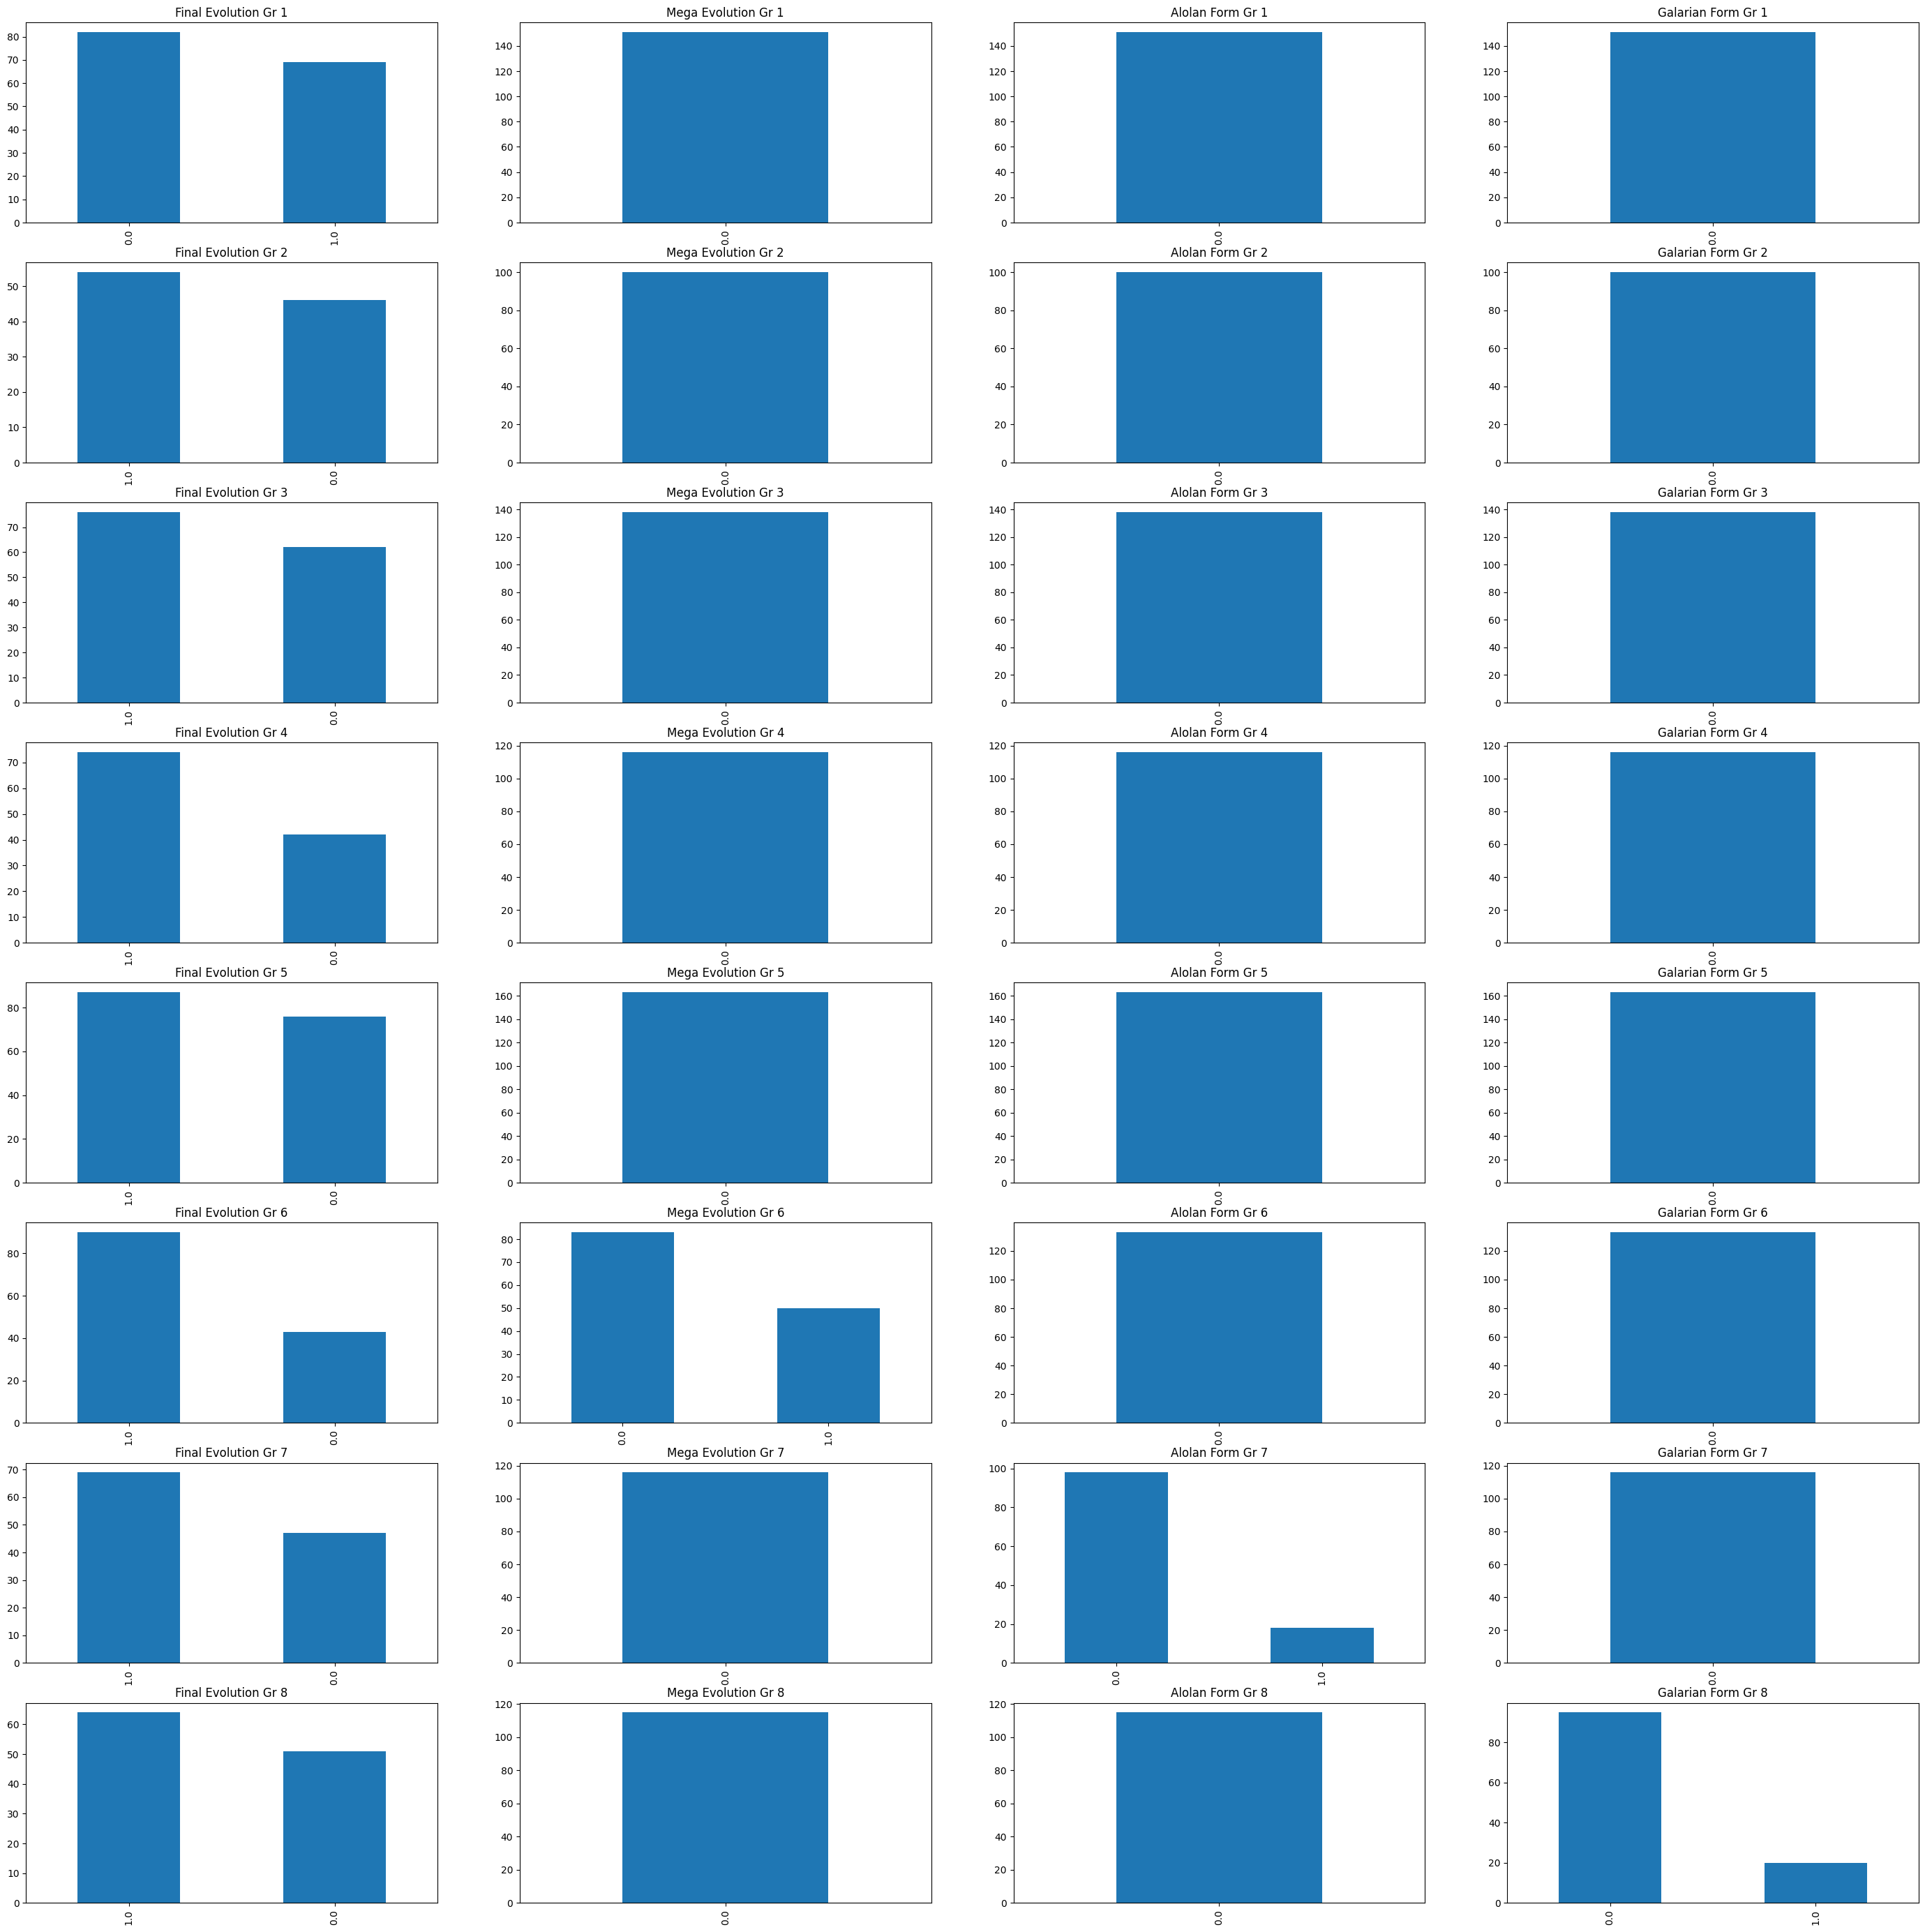

In [ ]:
evolutions = ['Final Evolution', 'Mega Evolution', 'Alolan Form', 'Galarian Form']
plt.figure(figsize = (35, 35))
n = 1
for i in range(1,9):
        for j in evolutions:
                plt.subplot(8, 4, n)
                evol_data2[evol_data2["Generation"] == i][j].value_counts().plot(kind = "bar")
                plt.title(j + " Gr " + str(i))
                n = n + 1
   

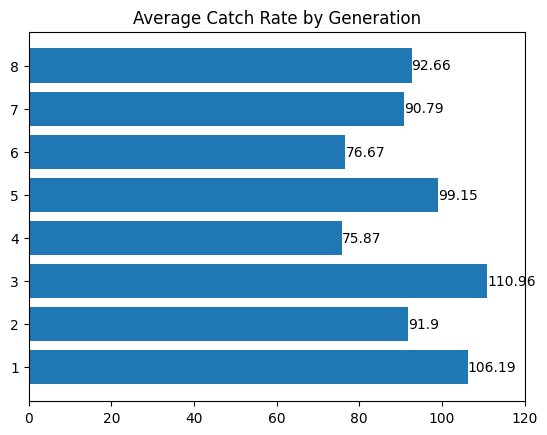

In [ ]:
catch_data = data[['Name', 'Type 1', "Generation", 'Catch Rate']]
catch_data = pd.DataFrame(catch_data.groupby("Generation")["Catch Rate"].mean()).reset_index()
catch_data_plot = plt.barh(y = catch_data["Generation"], width = round(catch_data["Catch Rate"],2) )
plt.bar_label(catch_data_plot, labels = round(catch_data["Catch Rate"],2), label_type = "edge")
plt.xlim([0,120])
plt.title("Average Catch Rate by Generation")
plt.show()

#So this chart shows that Catch Rate could be included in our model. Won't be deleted.

In [ ]:
data.drop(labels = "Experience type", axis = "columns", inplace = True)

In [ ]:
data.drop(labels = ["Number", "Name"], axis = "columns", inplace = True)

In [ ]:
typedata = pd.DataFrame(data["Type 1"].value_counts()).reset_index()
typedata.head()

index  Type 1
0    Water     131
1   Normal     114
2    Grass      91
3      Bug      81
4  Psychic      77

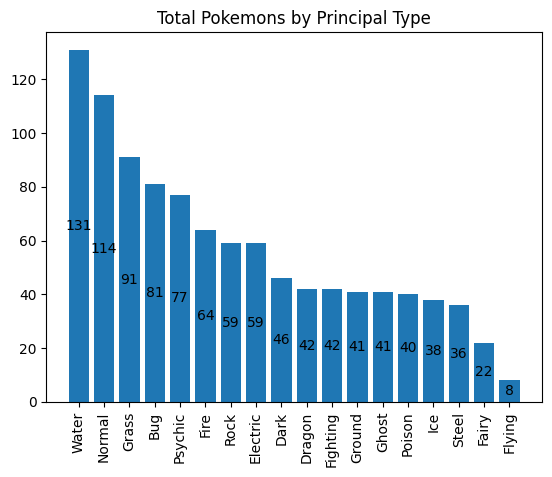

In [ ]:
typedata = pd.DataFrame(data["Type 1"].value_counts()).reset_index()
typedataplot = plt.bar(x = typedata["index"], height = typedata["Type 1"])
plt.title("Total Pokemons by Principal Type")
plt.bar_label(typedataplot, labels = typedata["Type 1"], label_type = "center")
plt.xticks(rotation = 90)
plt.show()


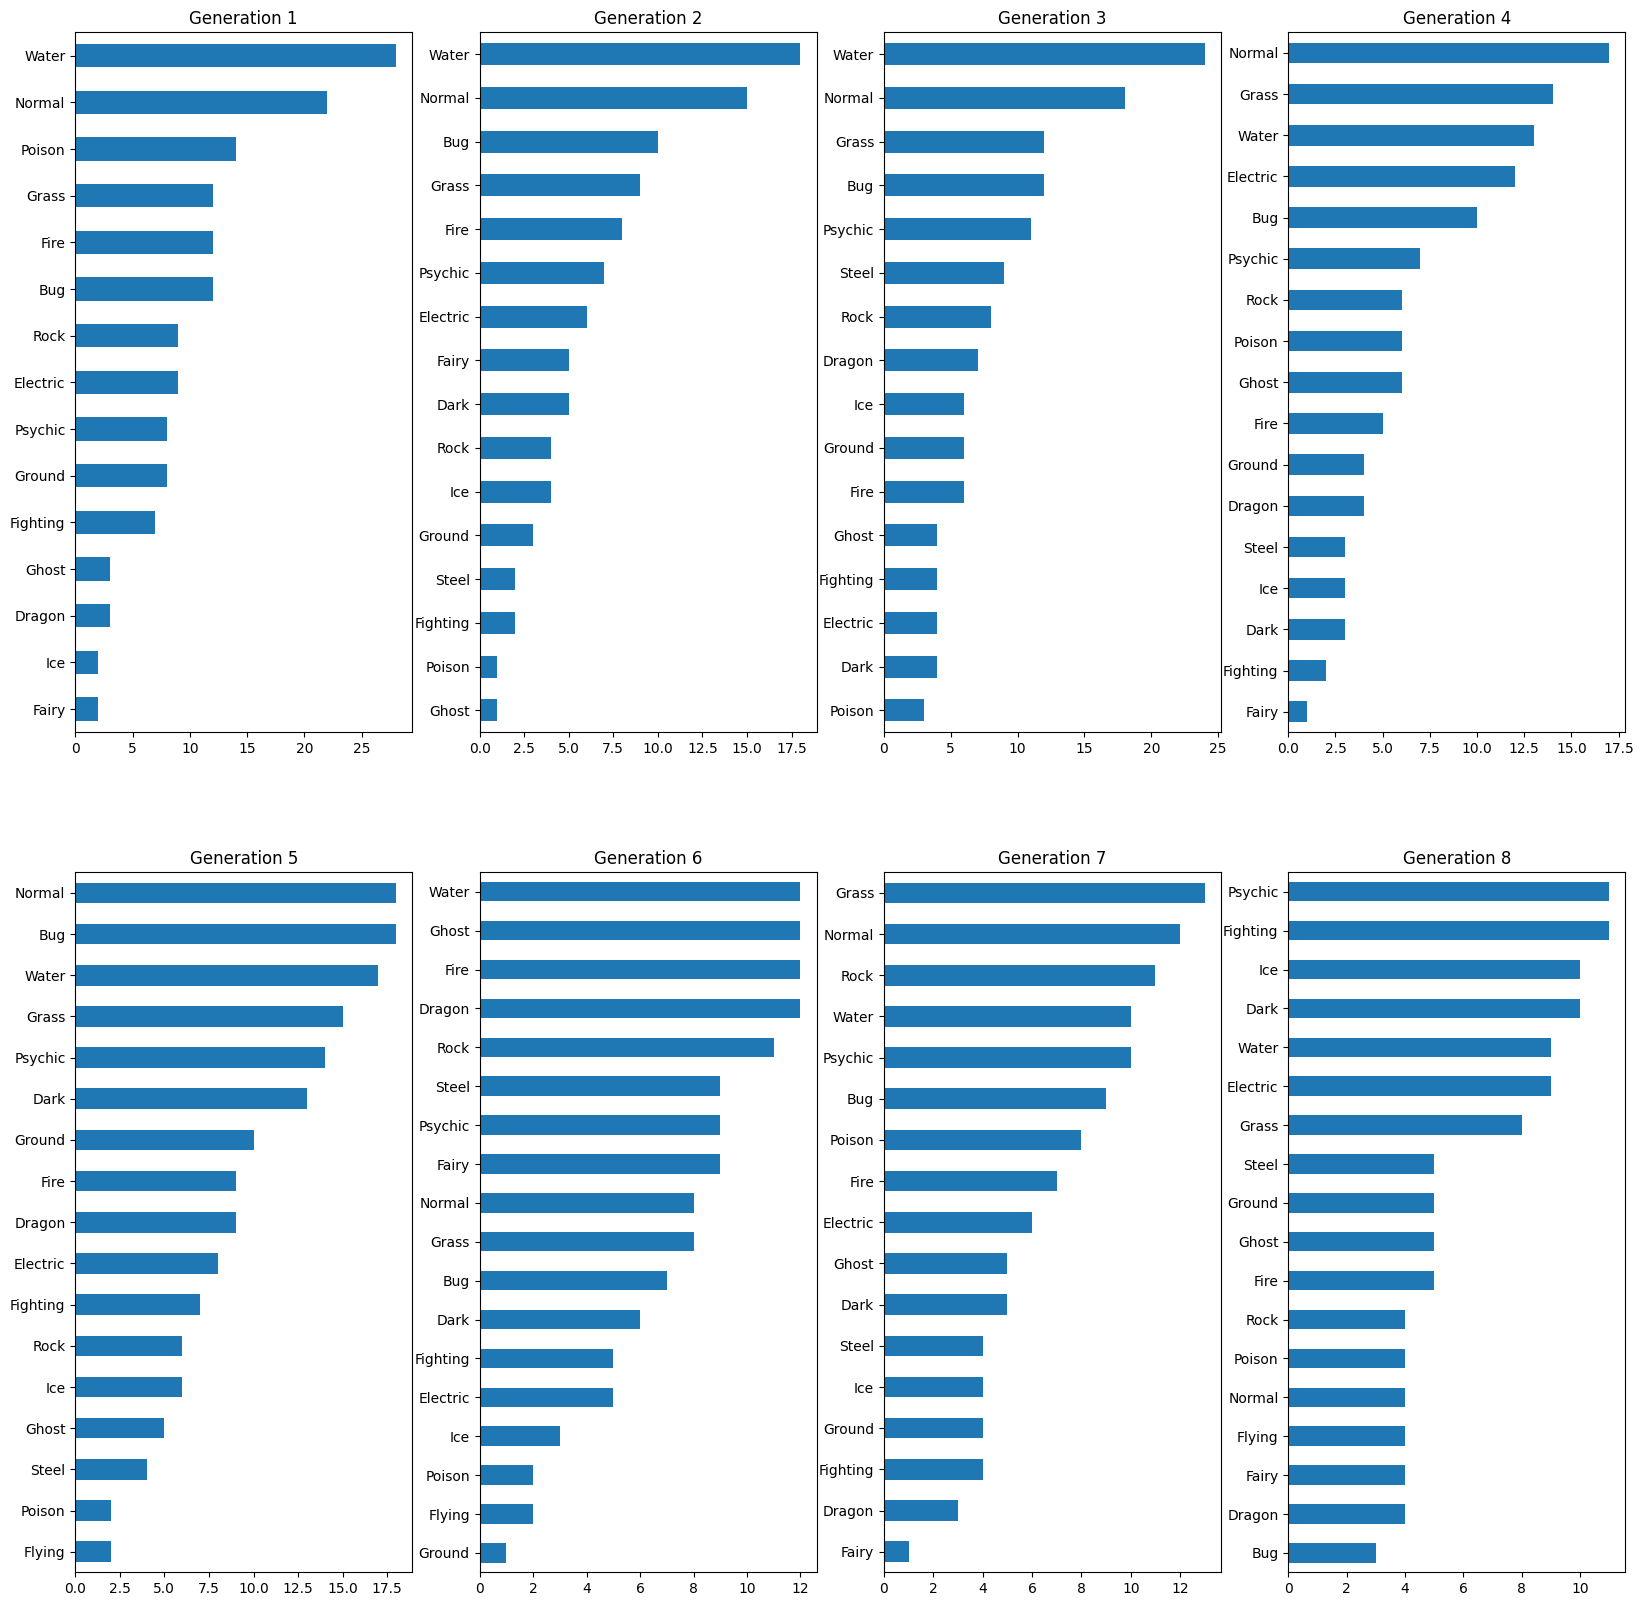

In [ ]:
plt.figure(figsize = (20, 20))
for i in range(1,len(data.Generation.unique())+1):
    plt.subplot(2, 4, i)
    data.groupby("Generation")["Type 1"].value_counts(ascending = True)[i].plot(kind = "barh")
    plt.ylabel("")
    plt.title("Generation" + " " + str(i))
plt.show()

<AxesSubplot: >

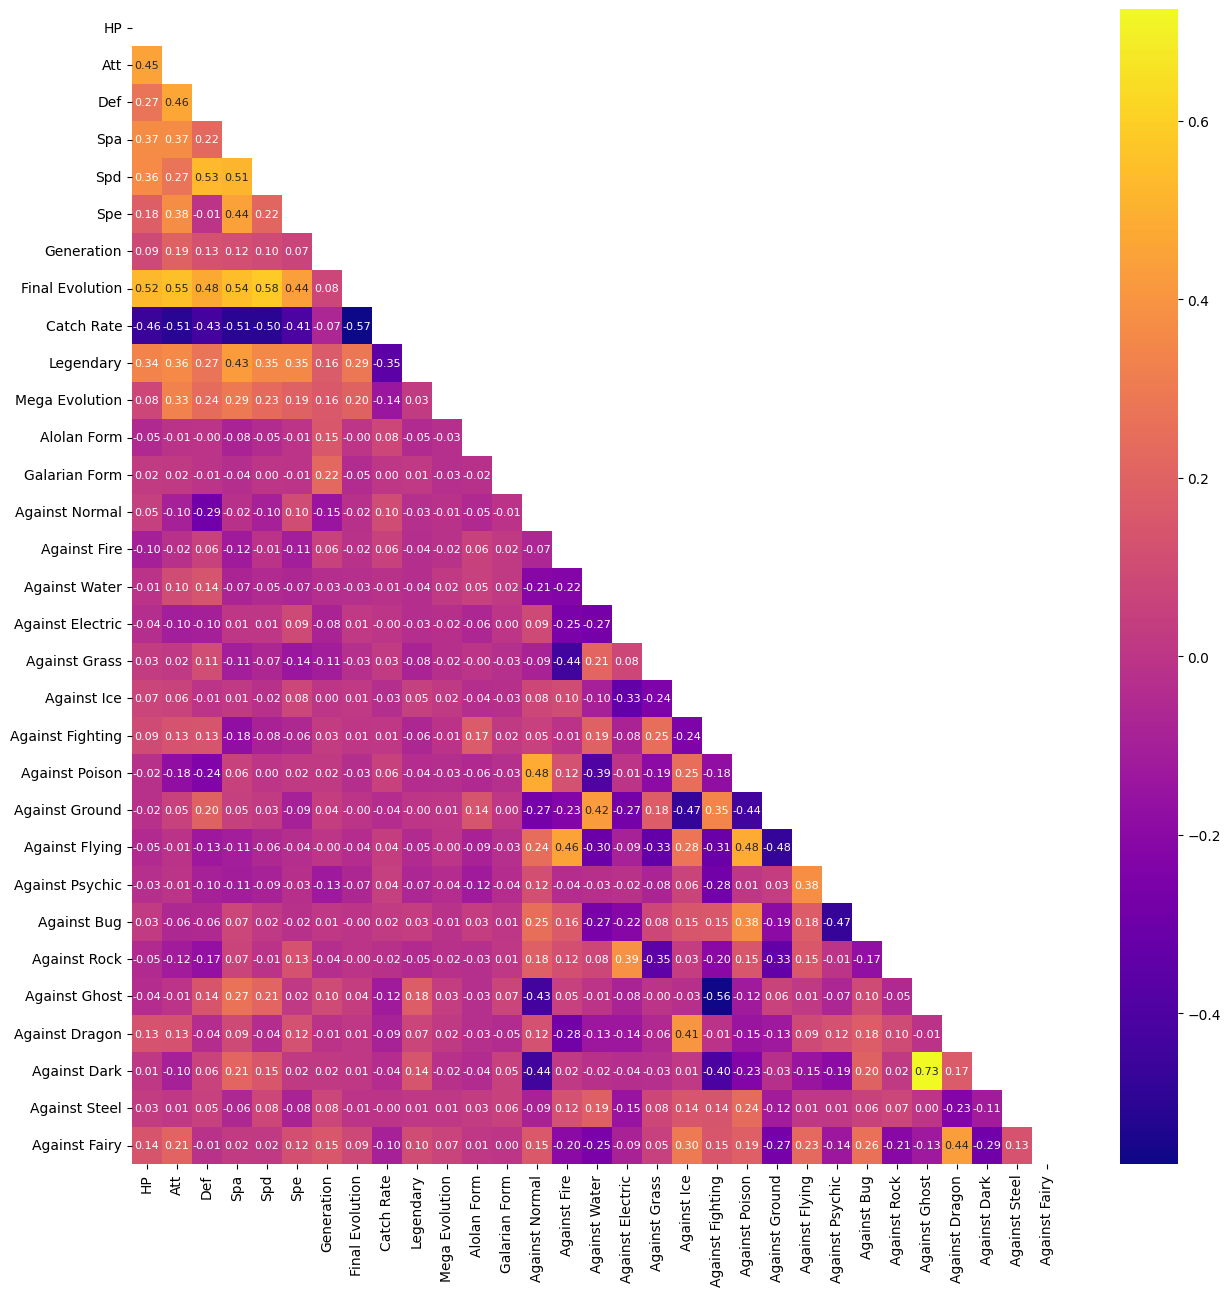

In [ ]:
#Here we will use Pearson correlation of the variables with our target
plt.figure(figsize = (15,15))
sns.heatmap(data.select_dtypes(np.number).corr(), annot = True, fmt = ".2f",cmap = "plasma", annot_kws= {"fontsize":8},
            mask = np.triu(np.ones_like(data.select_dtypes(np.number).corr())))
#It doesn not look as a good way to recognize which variables will be use

In [ ]:
data.drop(labels = "Type 1", axis = "columns", inplace = True)

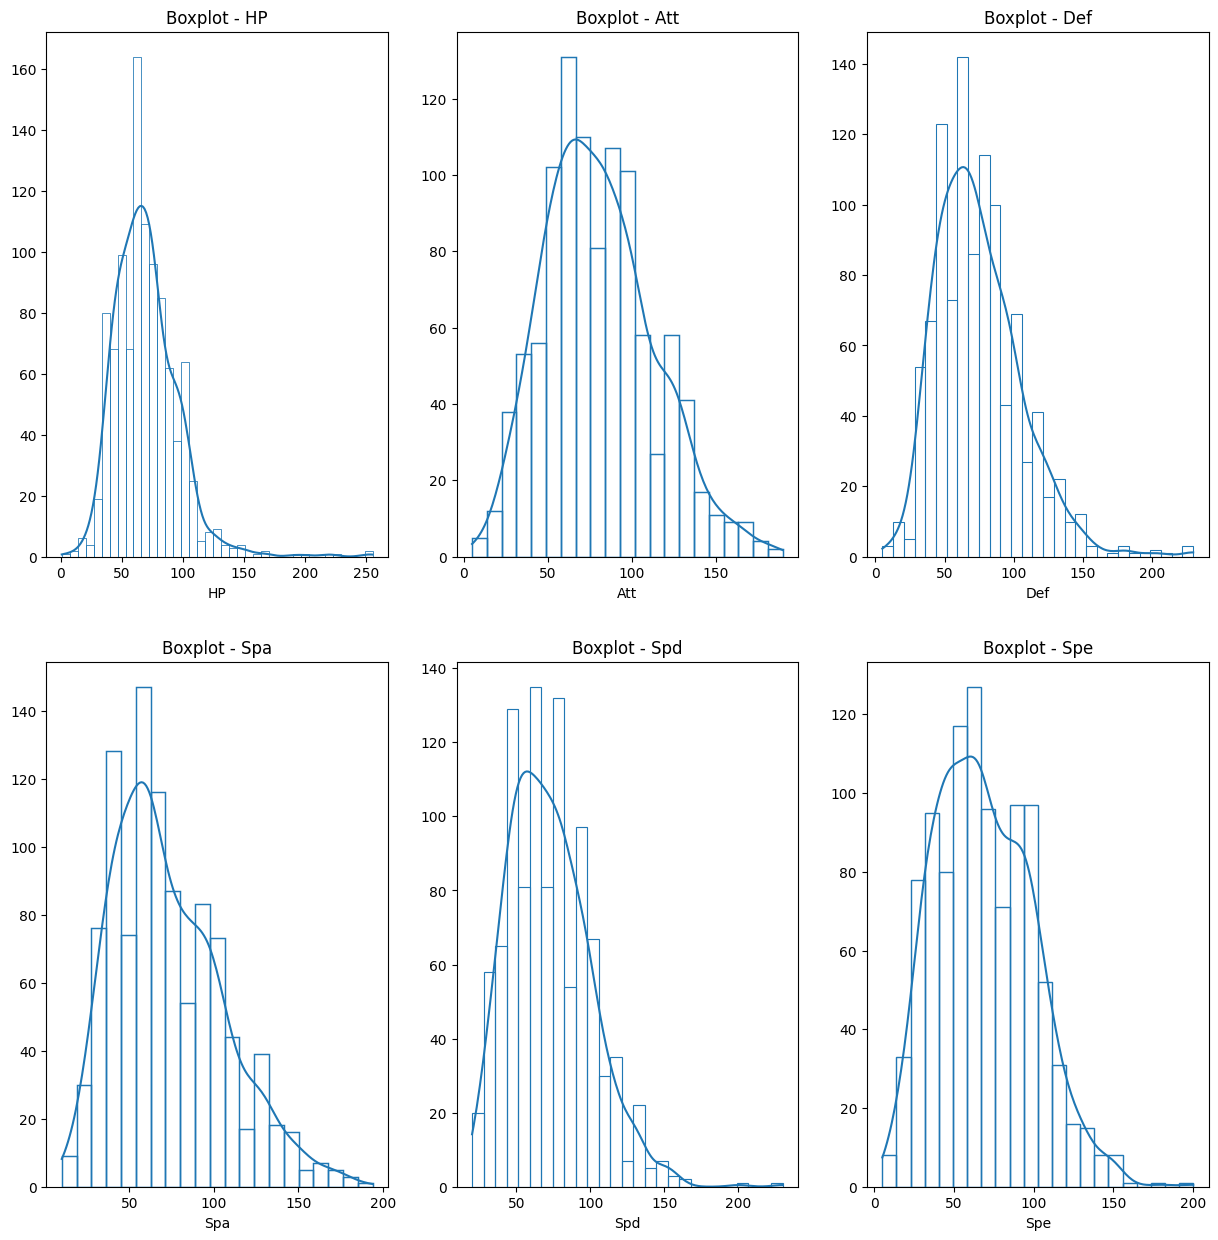

In [ ]:
dic = {0: "HP",	1 : "Att", 2 : "Def", 3 : "Spa", 4 : "Spd",	5 : "Spe"}
plt.figure(figsize = (15,15))
for i in range(1,7):
    plt.subplot(2, 3, i)
    sns.histplot(data.iloc[:, i-1], kde = True, fill=False )
    plt.title("Boxplot" + " - " + dic[i-1])
    plt.ylabel("")
#It looks like a normal distribution, so we will continue using these features for our model

Text(0.5, 1.0, 'Correlation Chart')

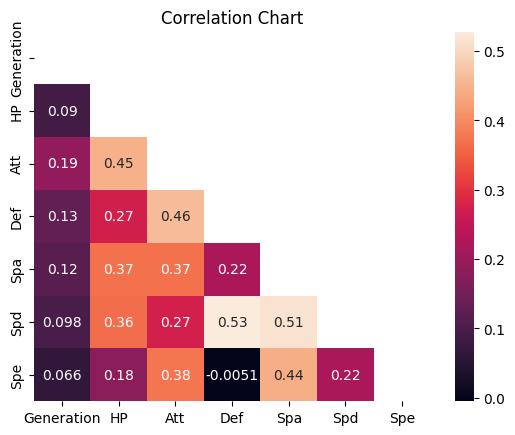

In [ ]:
#Correlation for these features
sns.heatmap(data[["Generation",'HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']].corr(), annot = True,
            mask = np.triu(np.ones_like(data[["Generation",'HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']].corr())))
plt.title("Correlation Chart")

C:\Users\alvar\AppData\Local\Temp\ipykernel_17764\1231829717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sts_data["Generation"] = sts_data["Generation"].astype("category")


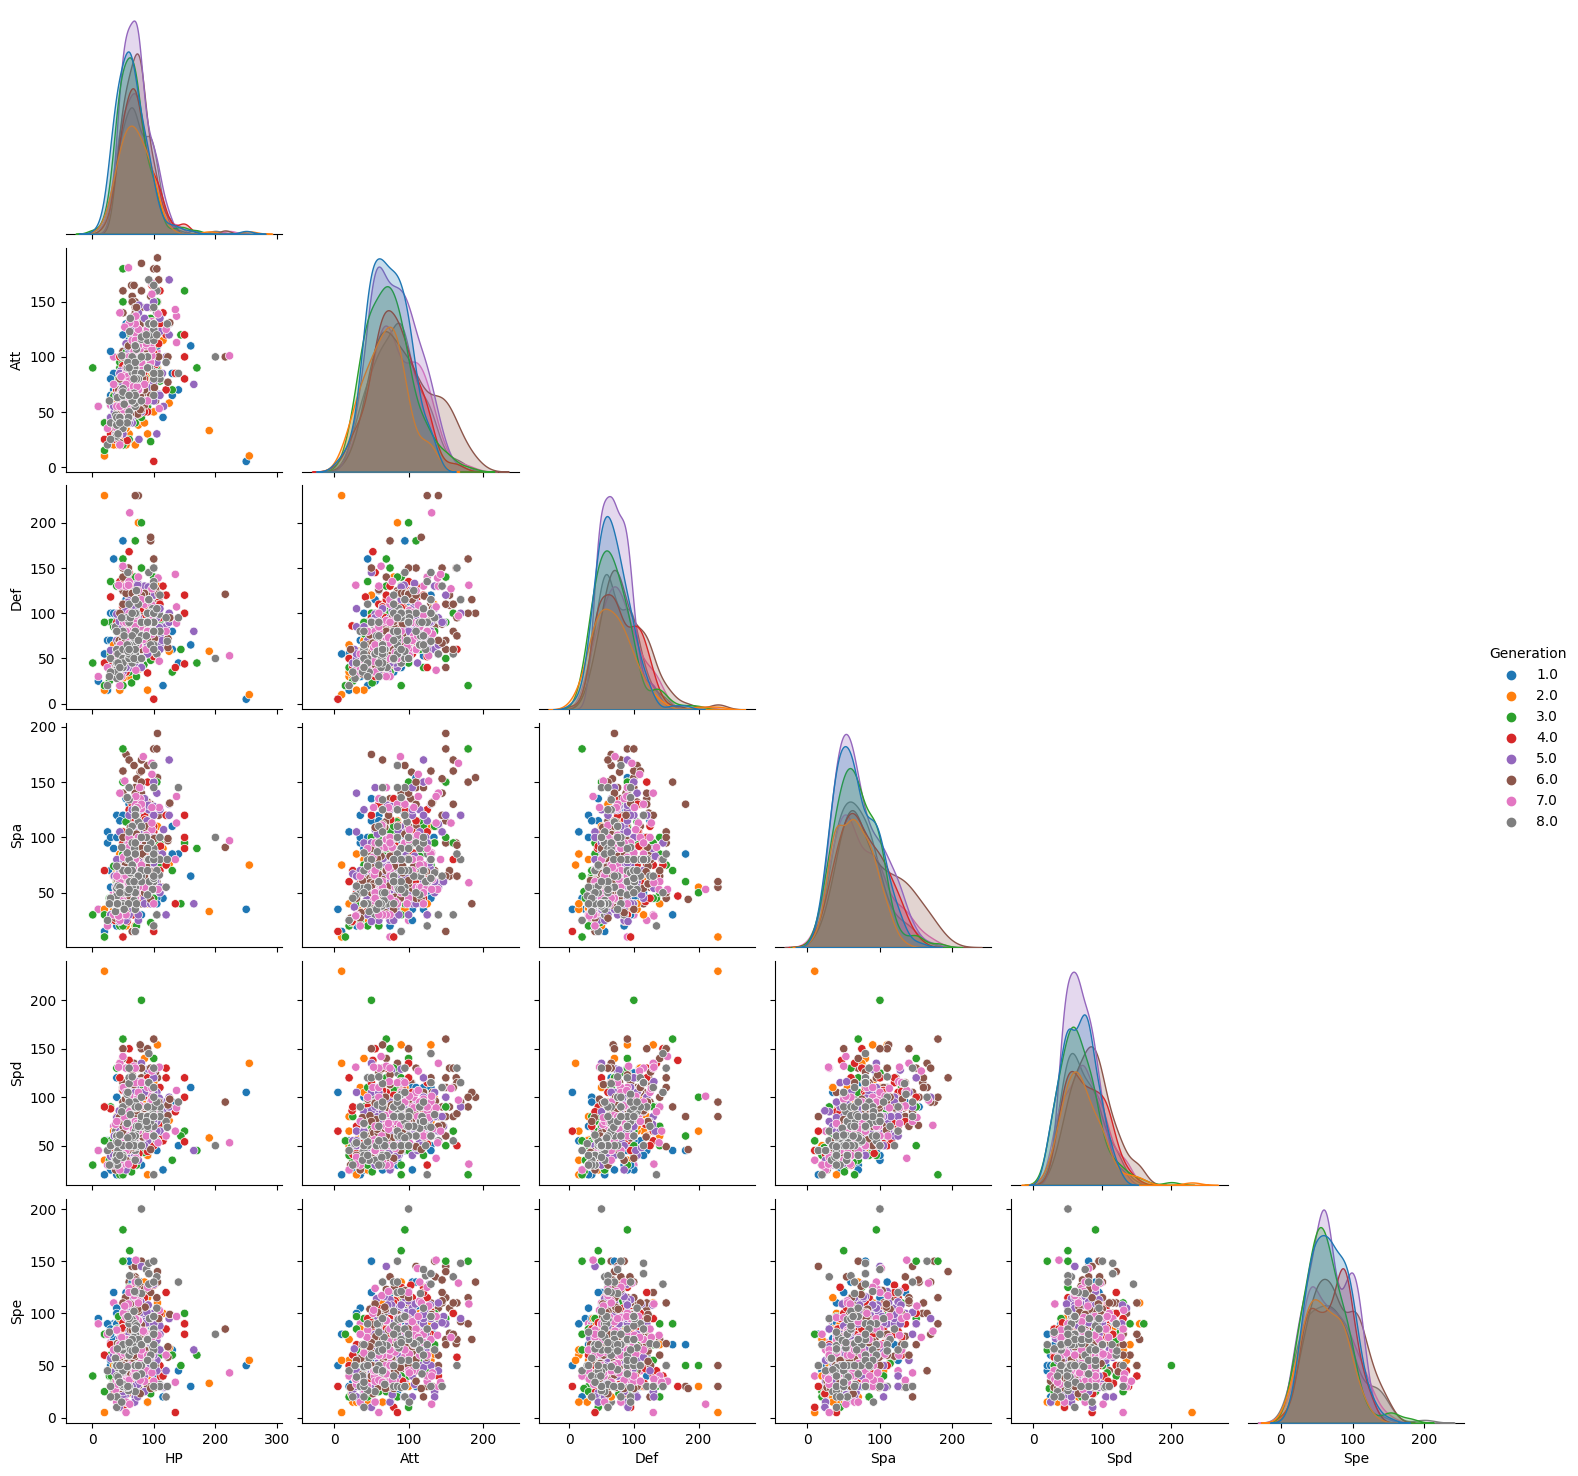

In [ ]:
sts_data = data[['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe', 'Generation']]
sts_data["Generation"] = sts_data["Generation"].astype("category")
sns.pairplot(sts_data, hue = "Generation", corner = True)

c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.a

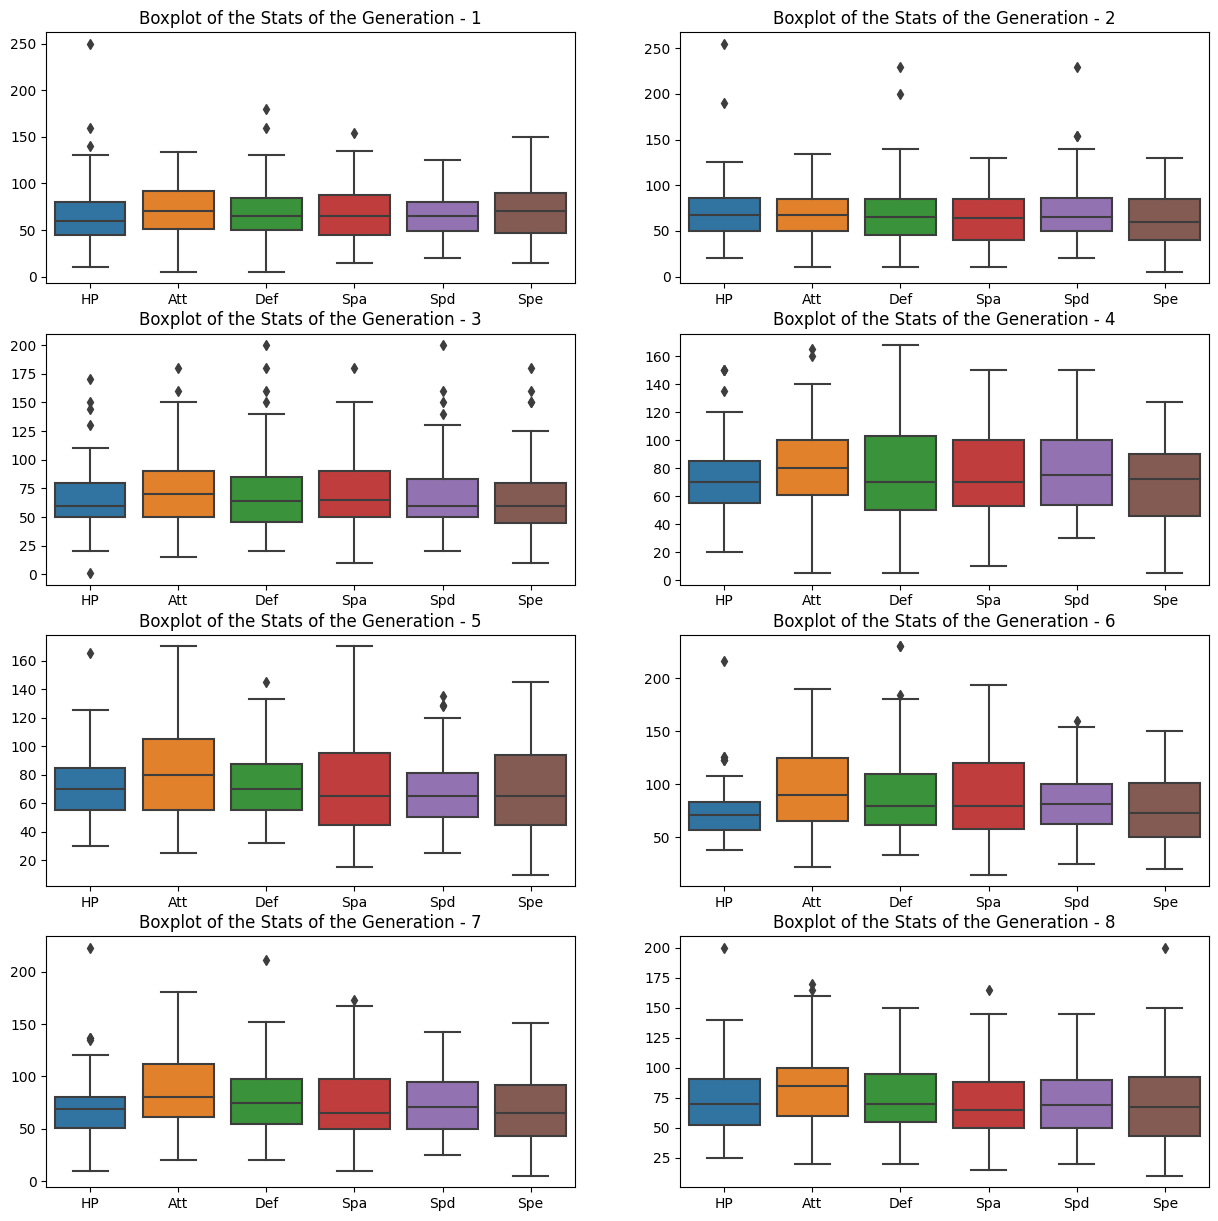

In [ ]:
#col = ["HP", "Att", "Def", "Spa", "Spd", "Spe"]
i = 1
plt.figure(figsize = (15,15))
for j in range(1,9):
    plt.subplot(4, 2, i)
    x = data.iloc[pd.DataFrame(np.where(data["Generation"] == i)).iloc[0,:].values, 0:6]
    sns.boxplot(data = x)
    plt.title("Boxplot of the Stats of the "+ "Generation" + " - " + str(j))
    i +=1
plt.show()

#### MODELS

In [ ]:
data.head()

HP  Att  Def  Spa  Spd  Spe  Generation  Final Evolution  Catch Rate  \
0  45   49   49   65   65   45         1.0              0.0          45   
1  60   62   63   80   80   60         1.0              0.0          45   
2  80   82   83  100  100   80         1.0              1.0          45   
3  80  100  123  122  120   80         6.0              1.0          45   
4  39   52   43   60   50   65         1.0              0.0          45   

   Legendary  ...  Against Ground  Against Flying  Against Psychic  \
0        0.0  ...             1.0             2.0              2.0   
1        0.0  ...             1.0             2.0              2.0   
2        0.0  ...             1.0             2.0              2.0   
3        0.0  ...             1.0             2.0              2.0   
4        0.0  ...             2.0             1.0              1.0   

   Against Bug  Against Rock  Against Ghost  Against Dragon  Against Dark  \
0          1.0           1.0            1.0             1.0           1.0   
1          1.0           1.0            1.0             1.0           1.0   
2          1.0           1.0            1.0             1.0           1.0   
3          1.0           1.0            1.0             1.0           1.0   
4          0.5           2.0            1.0             1.0           1.0   

   Against Steel  Against Fairy  
0            1.0            0.5  
1            1.0            0.5  
2            1.0            0.5  
3            1.0            0.5  
4            0.5            0.5  

[5 rows x 31 columns]

In [ ]:
X = data.drop(labels = "Generation", axis = "columns")   #Features
y = data["Generation"] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)

### Decision Tree Classifier

"The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation" - Sklearn Documentation [https://scikit-learn.org/stable/modules/tree.html#tree]

### Random Forest Classifier

"A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting" - Sklearn Documentation [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html]

### Gradient Boosting Classifier

"This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions" - Sklearn Documentation [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier]

#### First Try

Here we won't modify the parameters of the models

In [ ]:
dstree = DecisionTreeClassifier(random_state = 999).fit(X_train, y_train)
rf = RandomForestClassifier(random_state = 999).fit(X_train, y_train)
gb = GradientBoostingClassifier(random_state = 999).fit(X_train, y_train)
svc = SVC(random_state = 999).fit(X_train, y_train)

models = [dstree, rf, gb, svc]
test_result_first_model = []
train_result_first_model = []

for i in models:
    y_test_pred = i.predict(X_test)
    y_train_pred = i.predict(X_train)
    print("Accuracy for ", i, " model test: ", metrics.accuracy_score(y_test, y_test_pred))
    print("Accuracy for ", i, " model train: ", metrics.accuracy_score(y_train, y_train_pred))
    print(" ")  
    test_result_first_model.append(metrics.accuracy_score(y_test, y_test_pred))
    train_result_first_model.append(metrics.accuracy_score(y_train, y_train_pred))

Accuracy for  DecisionTreeClassifier(random_state=999)  model test:  0.2838709677419355
Accuracy for  DecisionTreeClassifier(random_state=999)  model train:  1.0
 
Accuracy for  RandomForestClassifier(random_state=999)  model test:  0.3225806451612903
Accuracy for  RandomForestClassifier(random_state=999)  model train:  1.0
 
Accuracy for  GradientBoostingClassifier(random_state=999)  model test:  0.35161290322580646
Accuracy for  GradientBoostingClassifier(random_state=999)  model train:  0.9584487534626038
 
Accuracy for  SVC(random_state=999)  model test:  0.1935483870967742
Accuracy for  SVC(random_state=999)  model train:  0.24930747922437674
 


In [ ]:
models_importances = [dstree, rf, gb]

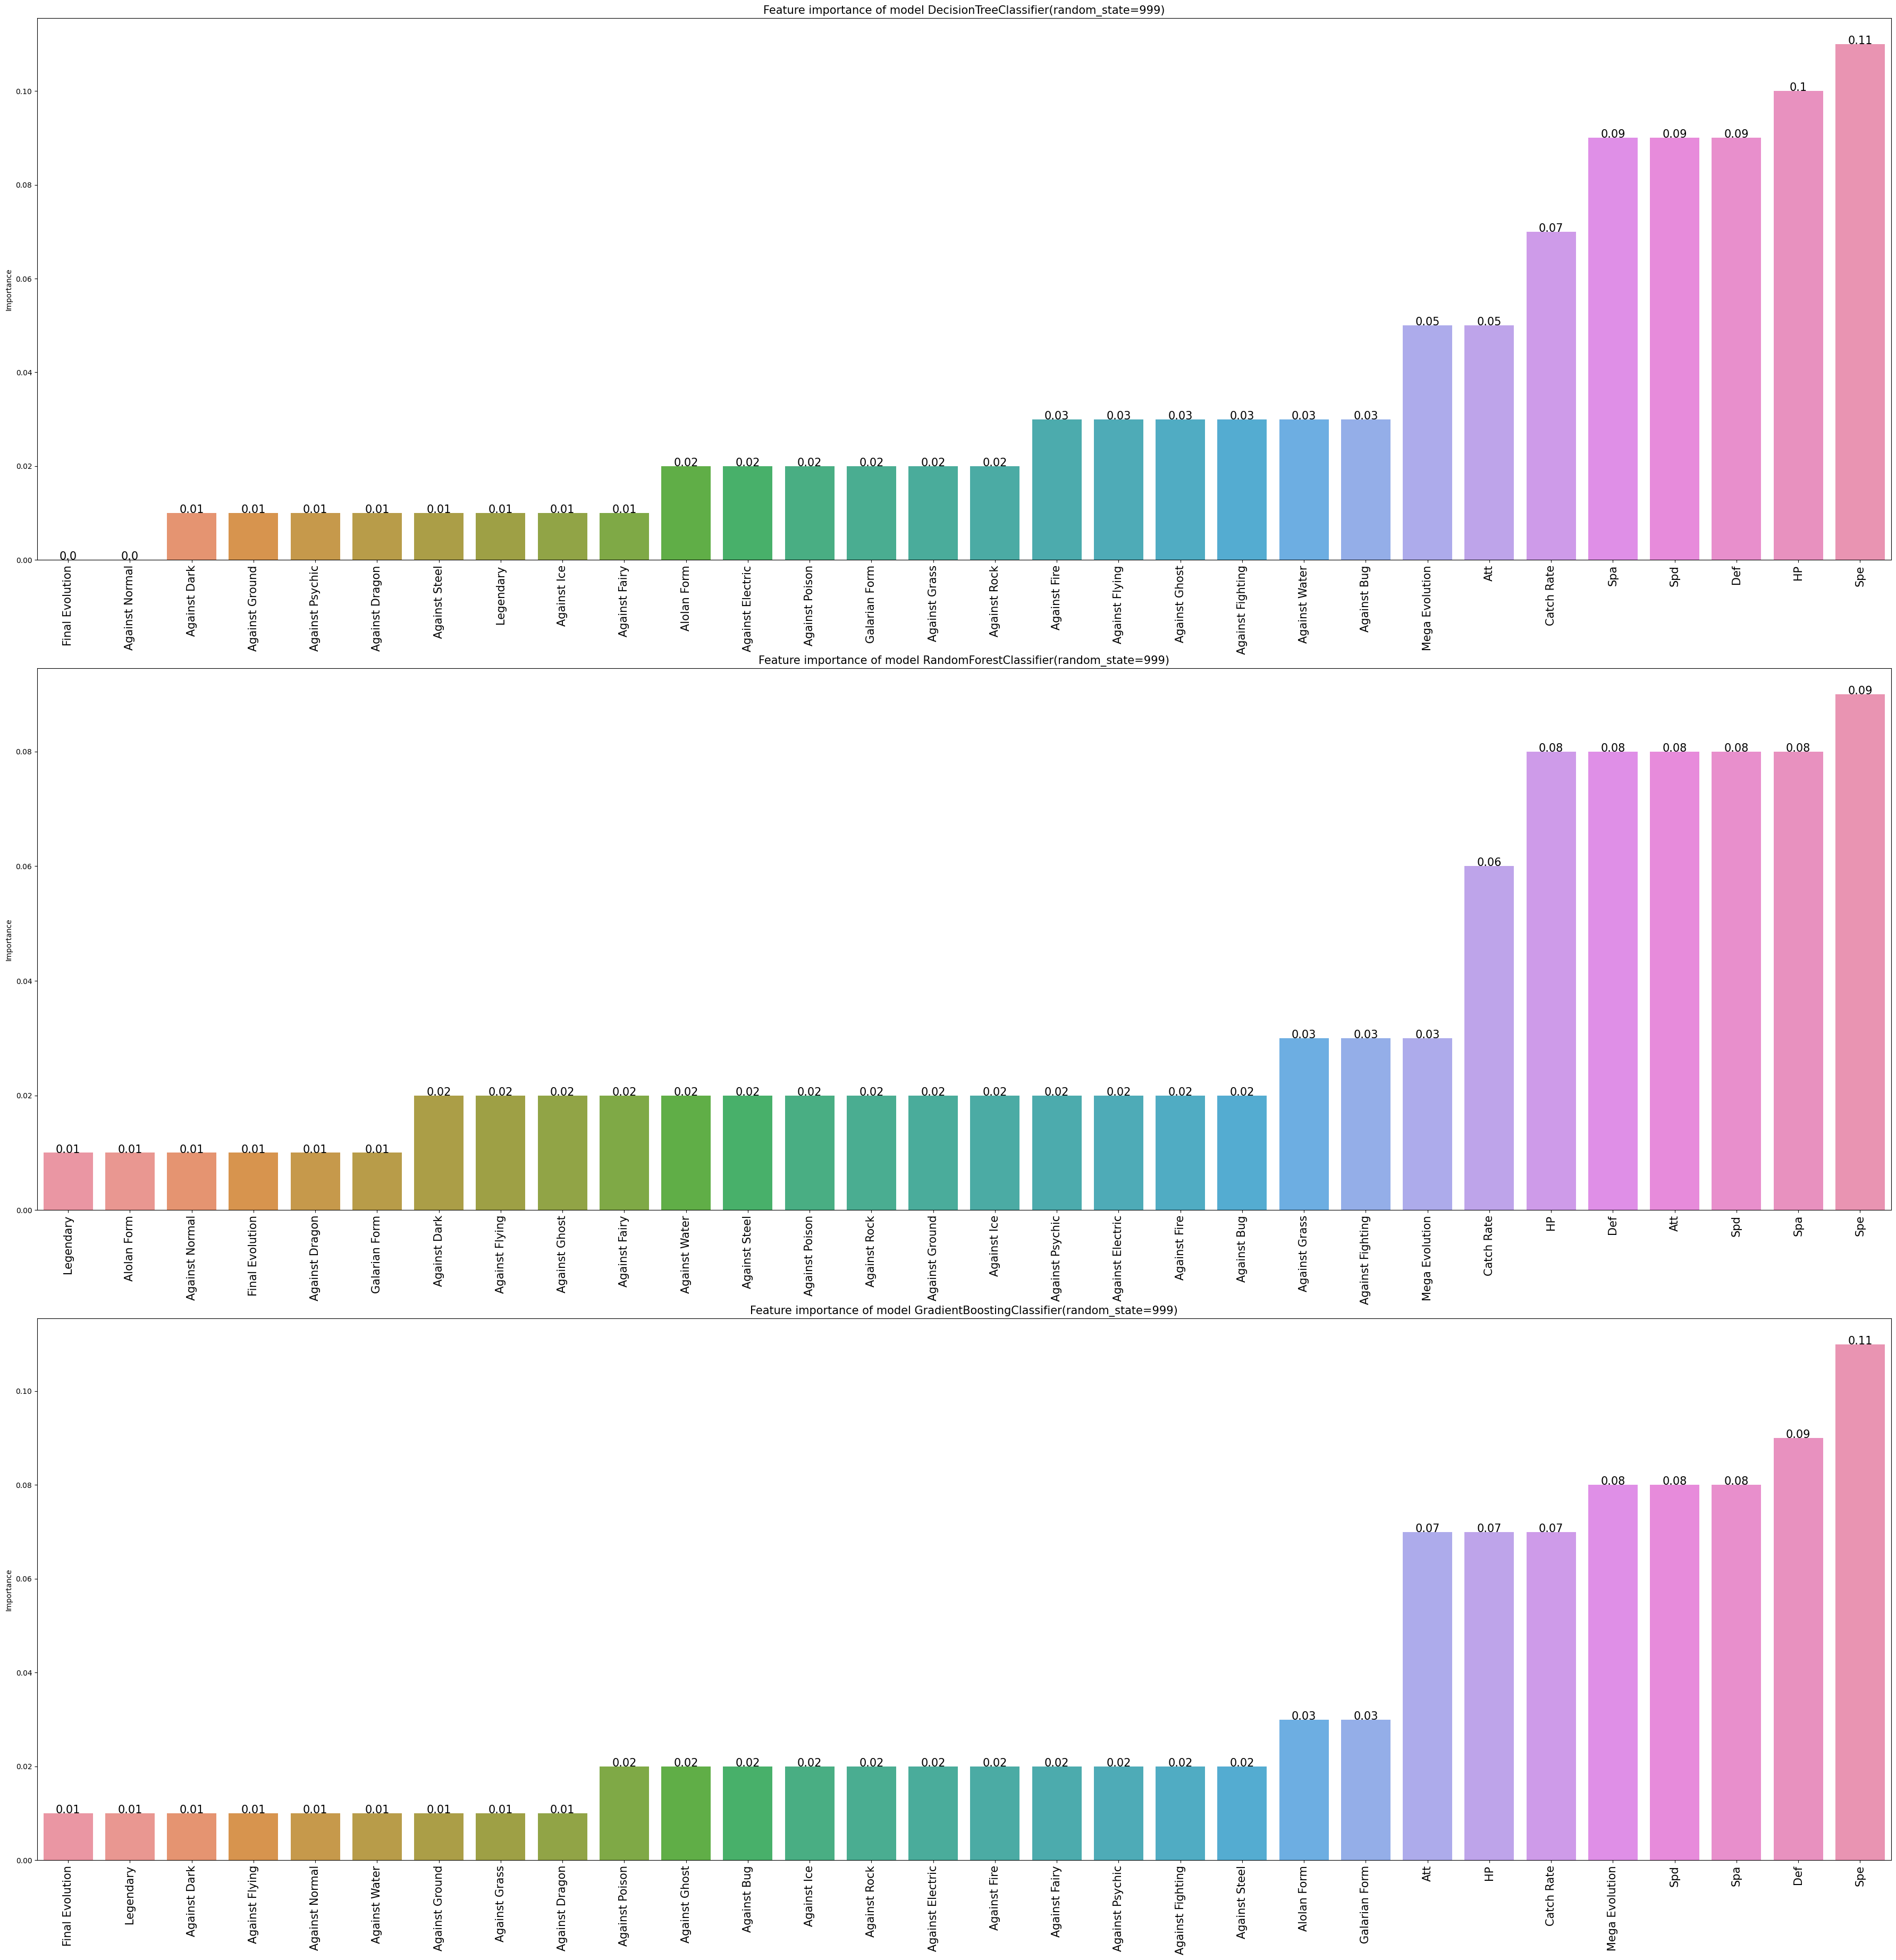

In [ ]:
#Importance's features of the models
plt.figure(figsize = (45,45))
n = 1
for i in models_importances:
    plt.subplot(3,1,n)
    importances = i.feature_importances_
    columns = X.columns
    df = pd.DataFrame(importances, index = columns).reset_index()
    df.rename({"index" : "Stats", 0 : "Importance"}, inplace = True, axis = "columns")
    df.sort_values(by = "Importance", inplace = True)
    df["Importance"] = round(df["Importance"], 2)
    chart = sns.barplot(x = df.Stats, y = df.Importance)
    for j in chart.patches:
        chart.annotate(j.get_height(), (j.get_x() + j.get_width() / 2, j.get_height()), ha = "center", fontsize = 15)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.xlabel("")
    plt.title("Feature importance of model " + str(i), fontsize = 15)
    n = n + 1

#### Second Try
Now we will modify some parameters in order to get a better accuracy score

In [ ]:
acc_train = []
acc_test = []
criterion = ["gini", "entropy"]
for i in range(3,50):
    for j in range(3,50):
        for k in criterion:
            dstree = DecisionTreeClassifier(random_state = 999, max_depth = i, min_samples_leaf = j, criterion = k).fit(X_train, y_train)
            y_test_pred_dstree = dstree.predict(X_test)
            y_train_pred_dstree = dstree.predict(X_train)
            acc_test.append(metrics.accuracy_score(y_test, y_test_pred_dstree))
            acc_train.append(metrics.accuracy_score(y_train, y_train_pred_dstree))

In [ ]:
dstreedf = pd.DataFrame(data = {'acc_test' : acc_test, 'acc_train' : acc_train})
dstreedf[dstreedf["acc_test"] == dstreedf["acc_test"].max()]

acc_test  acc_train
1787  0.345161   0.720222

In [ ]:
acc_train = []
acc_test = []
criterion = ["gini", "entropy"]
for i in range(3,100):
        for k in criterion:
            rf = RandomForestClassifier(random_state = 999, max_depth = i, criterion = k).fit(X_train, y_train)
            y_test_pred_rf = rf.predict(X_test)
            y_train_pred_rf = rf.predict(X_train)
            acc_test.append(metrics.accuracy_score(y_test, y_test_pred_rf))
            acc_train.append(metrics.accuracy_score(y_train, y_train_pred_rf))

In [ ]:
rfdf = pd.DataFrame(data = {'acc_test' : acc_test, 'acc_train' : acc_train})
rfdf[rfdf["acc_test"] == rfdf["acc_test"].max()]

acc_test  acc_train
14  0.358065   0.854571

In [ ]:
acc_train = []
acc_test = []
loss = [ 'deviance']
for i in range(3,100):
        for k in loss:
            gb = GradientBoostingClassifier(random_state = 999, n_estimators = i, loss = k, subsample = 0.2, learning_rate = 0.05).fit(X_train, y_train)
            y_test_pred_gb = gb.predict(X_test)
            y_train_pred_gb = gb.predict(X_train)
            acc_test.append(metrics.accuracy_score(y_test, y_test_pred_gb))
            acc_train.append(metrics.accuracy_score(y_train, y_train_pred_gb))

c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter nam

In [ ]:
gbdf = pd.DataFrame(data = {'acc_test' : acc_test, 'acc_train' : acc_train})
gbdf[gbdf["acc_test"] == gbdf["acc_test"].max()]

acc_test  acc_train
72   0.36129   0.735457

#### Improving the model selection

Here we will use StratifiedKFold  in order to improve our model selection and results

In [ ]:
y2 = y.to_numpy()
X2 = X.to_numpy()

In [ ]:
dstree = DecisionTreeClassifier(random_state = 999)
rf = RandomForestClassifier(random_state = 999)
gb = GradientBoostingClassifier(random_state = 999)
svc = SVC(random_state = 999)

models = [dstree, rf, gb, svc]

skf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 999)
# lst_accu_stratifiedKfold_test = []
# lst_accu_stratifiedKfold_train = []

test_result_skfold = []
train_result_skfold = []

for i in models:
    lst_accu_stratifiedKfold_test = []
    lst_accu_stratifiedKfold_train = []
    for train_index , test_index in skf.split(X2, y2):
        X_train_fold, X_test_fold = X2[train_index], X2[test_index]
        y_train_fold, y_test_fold = y2[train_index], y2[test_index]
        
        i.fit(X_train_fold, y_train_fold)
        #print("score: ", dstree.score(X_test_fold, y_test_fold ))
        lst_accu_stratifiedKfold_test.append(i.score(X_test_fold, y_test_fold ))
        lst_accu_stratifiedKfold_train.append(i.score(X_train_fold, y_train_fold ))
    
    print("Accuracy for models: ")
    test_result_skfold.append(np.array(lst_accu_stratifiedKfold_test).mean().max())
    train_result_skfold.append(np.array(lst_accu_stratifiedKfold_train).mean().max())
    
    print(np.array(lst_accu_stratifiedKfold_test).mean().max(), " model test ", i)
    print(np.array(lst_accu_stratifiedKfold_train).mean().max(), " model train ", i)

Accuracy for models: 
0.2984938903097471  model test  DecisionTreeClassifier(random_state=999)
0.9982005001084383  model train  DecisionTreeClassifier(random_state=999)
Accuracy for models: 
0.367334470019892  model test  RandomForestClassifier(random_state=999)
0.9982005001084383  model train  RandomForestClassifier(random_state=999)
Accuracy for models: 
0.3662688263711281  model test  GradientBoostingClassifier(random_state=999)
0.8899488545046383  model train  GradientBoostingClassifier(random_state=999)
Accuracy for models: 
0.20547030406365446  model test  SVC(random_state=999)
0.2505538248528903  model train  SVC(random_state=999)


In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {'Accuracy_score_first_model_test' : test_result_first_model, 'Accuracy_score_first_model_train' : train_result_first_model,
         'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, 'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold}
Results_DF = pd.DataFrame(index = index_result, data = data_result)
Results_DF.head()

Accuracy_score_first_model_test  \
Decision Tree Classifier                             0.283871   
Random Forest Classifier                             0.322581   
Gradient Boosting Classifier                         0.351613   
SVC                                                  0.193548   

                              Accuracy_score_first_model_train  \
Decision Tree Classifier                              1.000000   
Random Forest Classifier                              1.000000   
Gradient Boosting Classifier                          0.958449   
SVC                                                   0.249307   

                              Accuracy_score_StratifiedKfold_model_test  \
Decision Tree Classifier                                       0.298494   
Random Forest Classifier                                       0.367334   
Gradient Boosting Classifier                                   0.366269   
SVC                                                            0.205470   

                              Accuracy_score_StratifiedKfold_model_train  
Decision Tree Classifier                                        0.998201  
Random Forest Classifier                                        0.998201  
Gradient Boosting Classifier                                    0.889949  
SVC                                                             0.250554

#### Feature selection

Here we will select the optimal features from our data to reduce the redundant data and delete those features thar are uncorrelated.

By doing that, we will reduces the complexity of the model and makes it easier and faster.

##### Boruta

This method will help us to remove features that are not statitical significant.

In [ ]:
rf = RandomForestClassifier(max_depth = 5, bootstrap = True, random_state = 999)
feat_selector = BorutaPy(rf, n_estimators = "auto", random_state = 999)
result_boruta = feat_selector.fit(X_train.values, y_train)
accept = X_train.columns[feat_selector.support_].to_list()
irresolution = X_train.columns[feat_selector.support_weak_].to_list()

print("Selectec:")
print("************************")
print(list(accept))
print(list(irresolution))
print("************************")

Selectec:
************************
['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe', 'Mega Evolution', 'Alolan Form', 'Galarian Form']
[]
************************


In [ ]:
forest = RandomForestClassifier(max_depth=5, bootstrap=True)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
importances

array([0.04476453, 0.05005823, 0.051325  , 0.06557047, 0.06553533,
       0.05622071, 0.005133  , 0.0312429 , 0.01774953, 0.18556926,
       0.0653904 , 0.09129617, 0.01287286, 0.01478888, 0.01092957,
       0.01858954, 0.01230796, 0.00595387, 0.02602371, 0.01457835,
       0.01412215, 0.00870878, 0.01870581, 0.01004697, 0.01768263,
       0.01133878, 0.02109792, 0.01136315, 0.0260825 , 0.01495104])

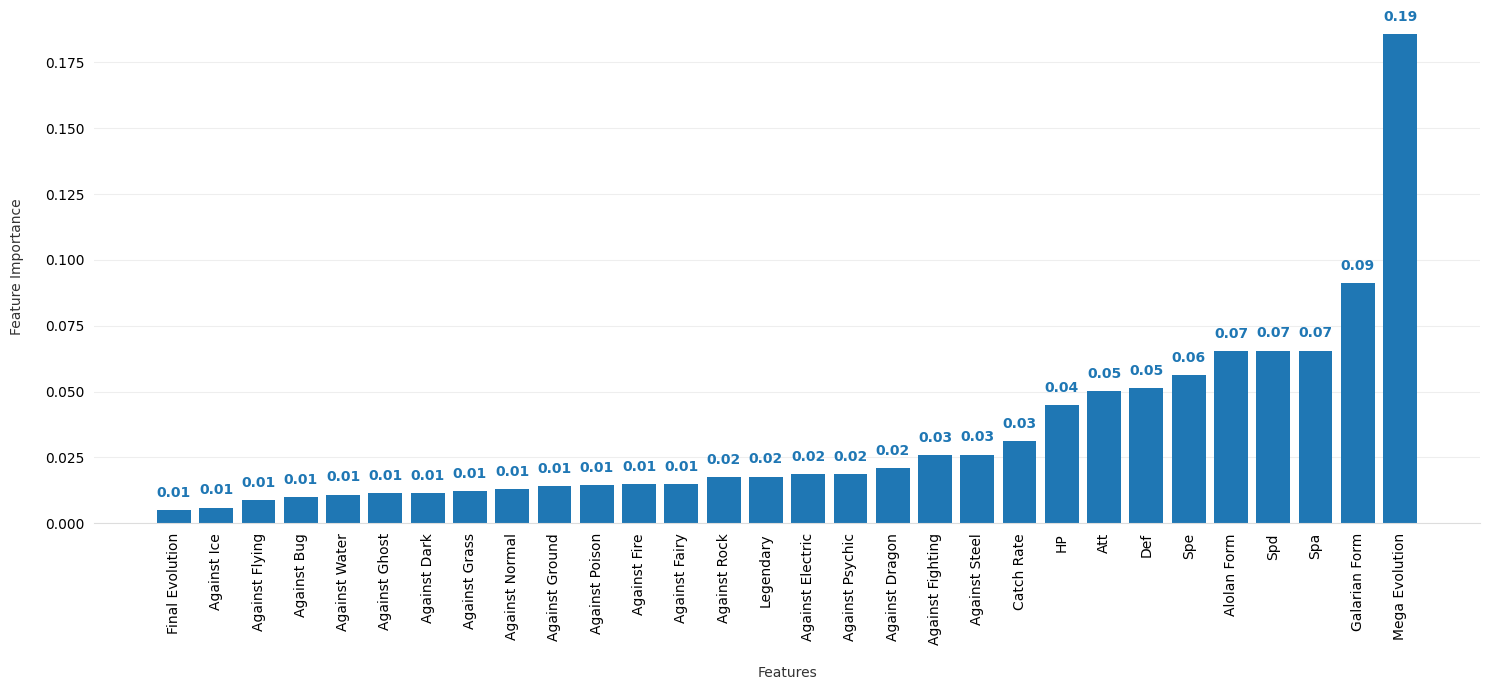

In [ ]:
sorted_idx = forest.feature_importances_.argsort()

fig, ax = plt.subplots(figsize = (15,7))
bars = ax.bar(X_train.columns[sorted_idx], forest.feature_importances_[sorted_idx])

# Axis formatting.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color = "#EEEEEE")
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.005,
      round(bar.get_height(), 2),
      horizontalalignment = "center",
      color = bar_color,
      weight = "bold"
  )

ax.set_xlabel("Features", labelpad=15, color='#333333')
ax.set_ylabel("Feature Importance", labelpad=15, color='#333333')
plt.xticks(rotation = 90)
fig.tight_layout()

In [ ]:
data_after_boruta = data[['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe', 'Mega Evolution', 'Alolan Form', 'Galarian Form', 'Generation']]
data_after_boruta.head()

HP  Att  Def  Spa  Spd  Spe  Mega Evolution  Alolan Form  Galarian Form  \
0  45   49   49   65   65   45             0.0          0.0            0.0   
1  60   62   63   80   80   60             0.0          0.0            0.0   
2  80   82   83  100  100   80             0.0          0.0            0.0   
3  80  100  123  122  120   80             1.0          0.0            0.0   
4  39   52   43   60   50   65             0.0          0.0            0.0   

   Generation  
0         1.0  
1         1.0  
2         1.0  
3         6.0  
4         1.0

#### Models using Relevant Features

Now we will use the features selected by Boruta algorithm

In [ ]:
X_b = data_after_boruta.drop(labels = "Generation", axis = "columns")   #Features
y_b = data_after_boruta["Generation"] # Target
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size = 0.3, random_state = 999)

In [ ]:
# The "_b" termination means that this model will be training using the features selected by boruta

dstree_b = DecisionTreeClassifier(random_state = 999).fit(X_train_b, y_train_b)
rf_b = RandomForestClassifier(random_state = 999).fit(X_train_b, y_train_b)
gb_b = GradientBoostingClassifier(random_state = 999).fit(X_train_b, y_train_b)
svc_b = SVC(random_state = 999).fit(X_train_b, y_train_b)

models_bo = [dstree_b, rf_b, gb_b, svc_b]
test_result_boruta = []
train_result_boruta = []

for i in models_bo:
    y_test_pred = i.predict(X_test_b)
    y_train_pred = i.predict(X_train_b)
    print("Accuracy for ", i, " model test: ", metrics.accuracy_score(y_test_b, y_test_pred))
    print("Accuracy for ", i, " model train: ", metrics.accuracy_score(y_train_b, y_train_pred))
    print(" ")  
    test_result_boruta.append(metrics.accuracy_score(y_test_b, y_test_pred))
    train_result_boruta.append(metrics.accuracy_score(y_train_b, y_train_pred))

Accuracy for  DecisionTreeClassifier(random_state=999)  model test:  0.24838709677419354
Accuracy for  DecisionTreeClassifier(random_state=999)  model train:  0.9930747922437673
 
Accuracy for  RandomForestClassifier(random_state=999)  model test:  0.27741935483870966
Accuracy for  RandomForestClassifier(random_state=999)  model train:  0.9930747922437673
 
Accuracy for  GradientBoostingClassifier(random_state=999)  model test:  0.2838709677419355
Accuracy for  GradientBoostingClassifier(random_state=999)  model train:  0.9044321329639889
 
Accuracy for  SVC(random_state=999)  model test:  0.2129032258064516
Accuracy for  SVC(random_state=999)  model train:  0.25069252077562326
 


In [ ]:
models_b = [dstree_b, rf_b, gb_b]

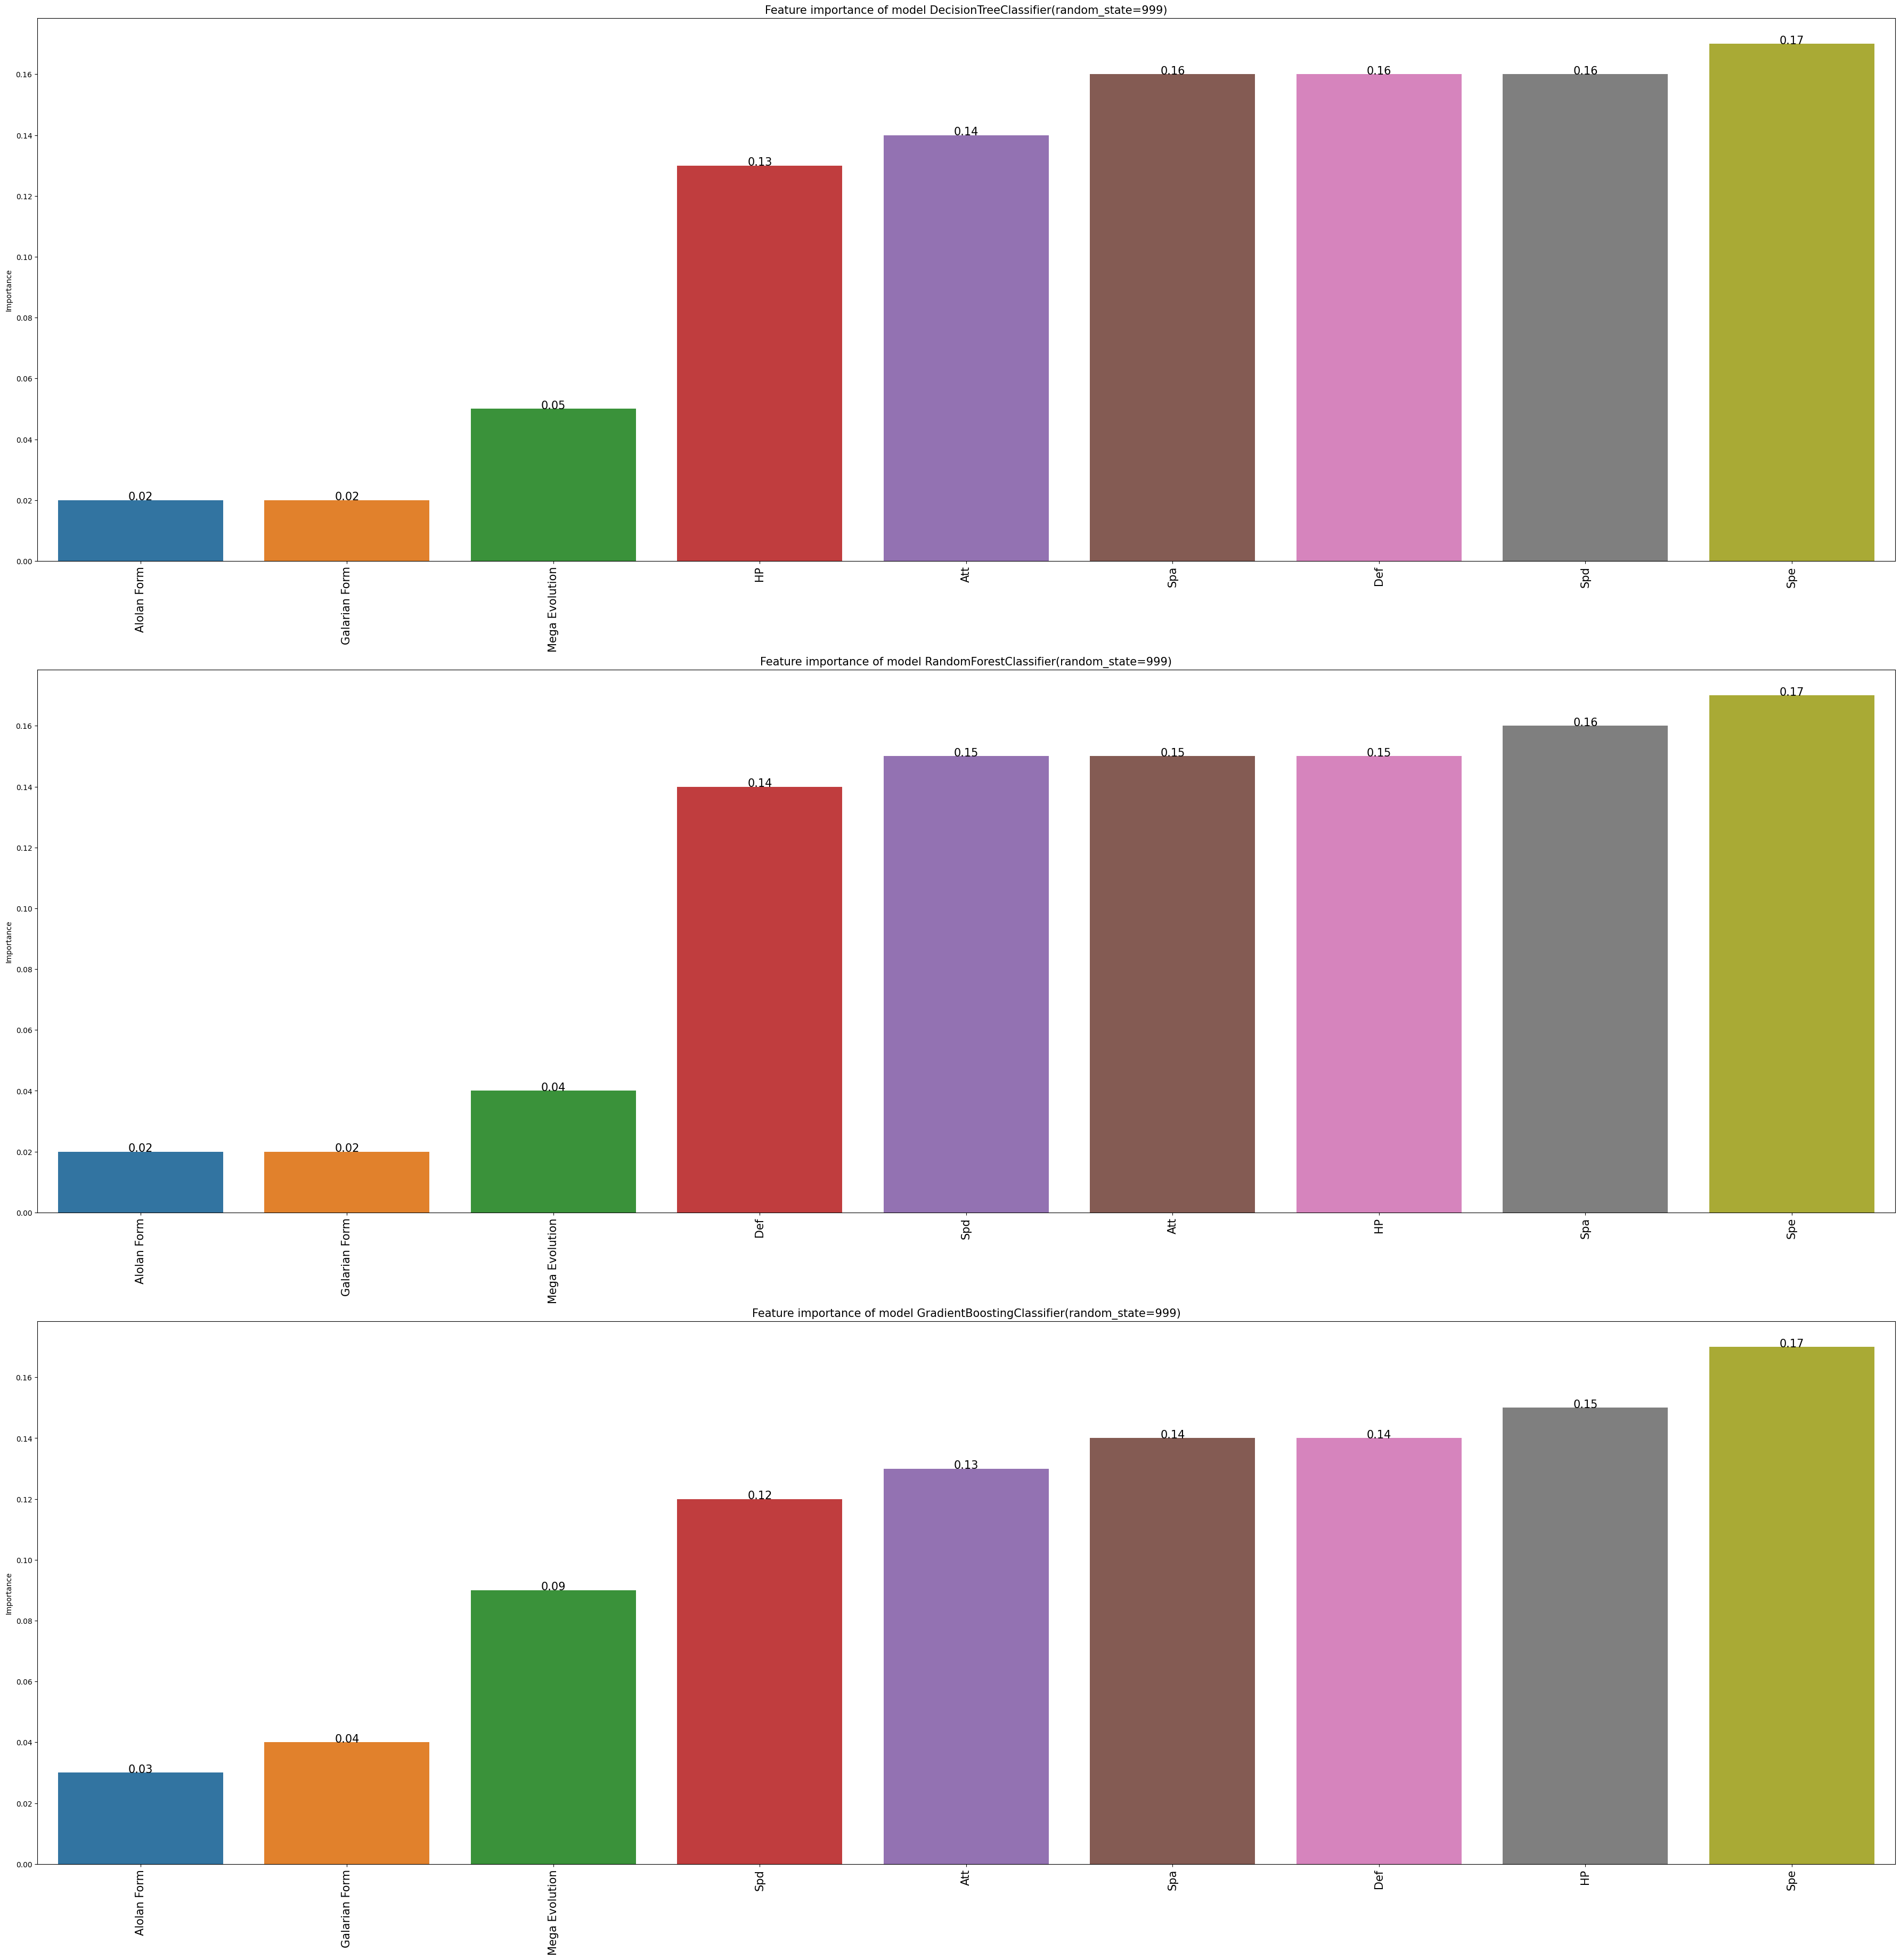

In [ ]:
plt.figure(figsize = (45,45))
n = 1
for i in models_b:
    plt.subplot(3,1,n)
    importances = i.feature_importances_
    columns = X_b.columns
    df = pd.DataFrame(importances, index = columns).reset_index()
    df.rename({"index" : "Stats", 0 : "Importance"}, inplace = True, axis = "columns")
    df.sort_values(by = "Importance", inplace = True)
    df["Importance"] = round(df["Importance"], 2)
    chart = sns.barplot(x = df.Stats, y = df.Importance)
    for j in chart.patches:
        chart.annotate(j.get_height(), (j.get_x() + j.get_width() / 2, j.get_height()), ha = "center", fontsize = 15)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.xlabel("")
    plt.title("Feature importance of model " + str(i), fontsize = 15)
    n = n + 1

In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {
              'Accuracy_score_first_model_test' : test_result_first_model, 'Accuracy_score_first_model_train' : train_result_first_model,
              'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, 'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold,
              'Accuracy_score_model_test_boruta' : test_result_boruta, 'Accuracy_score_model_train_boruta' : train_result_boruta
              }
Results_DF = pd.DataFrame(index = index_result, data = data_result)
Results_DF.head()

Accuracy_score_first_model_test  \
Decision Tree Classifier                             0.283871   
Random Forest Classifier                             0.322581   
Gradient Boosting Classifier                         0.351613   
SVC                                                  0.193548   

                              Accuracy_score_first_model_train  \
Decision Tree Classifier                              1.000000   
Random Forest Classifier                              1.000000   
Gradient Boosting Classifier                          0.958449   
SVC                                                   0.249307   

                              Accuracy_score_StratifiedKfold_model_test  \
Decision Tree Classifier                                       0.298494   
Random Forest Classifier                                       0.367334   
Gradient Boosting Classifier                                   0.366269   
SVC                                                            0.205470   

                              Accuracy_score_StratifiedKfold_model_train  \
Decision Tree Classifier                                        0.998201   
Random Forest Classifier                                        0.998201   
Gradient Boosting Classifier                                    0.889949   
SVC                                                             0.250554   

                              Accuracy_score_model_test_boruta  \
Decision Tree Classifier                              0.248387   
Random Forest Classifier                              0.277419   
Gradient Boosting Classifier                          0.283871   
SVC                                                   0.212903   

                              Accuracy_score_model_train_boruta  
Decision Tree Classifier                               0.993075  
Random Forest Classifier                               0.993075  
Gradient Boosting Classifier                           0.904432  
SVC                                                    0.250693

In [ ]:
y3 = y_b.to_numpy()
X3 = X_b.to_numpy()

In [ ]:
dstree_b = DecisionTreeClassifier(random_state = 999).fit(X_train_b, y_train_b)
rf_b = RandomForestClassifier(random_state = 999).fit(X_train_b, y_train_b)
gb_b = GradientBoostingClassifier(random_state = 999).fit(X_train_b, y_train_b)
svc_b = SVC(random_state = 999).fit(X_train_b, y_train_b)

models_bor = [dstree_b, rf_b, gb_b, svc_b]

skf_b = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 999)


test_result_skfold_boruta = []
train_result_skfold_boruta = []

for i in models_bor:
    lst_accu_stratifiedKfold_test_boruta = []
    lst_accu_stratifiedKfold_train_boruta = []
    for train_index , test_index in skf_b.split(X3, y3):
        X_train_fold, X_test_fold = X3[train_index], X3[test_index]
        y_train_fold, y_test_fold = y3[train_index], y3[test_index]
        
        i.fit(X_train_fold, y_train_fold)
        #print("score: ", dstree.score(X_test_fold, y_test_fold ))
        lst_accu_stratifiedKfold_test_boruta.append(i.score(X_test_fold, y_test_fold ))
        lst_accu_stratifiedKfold_train_boruta.append(i.score(X_train_fold, y_train_fold ))
    
    print("Accuracy for models: ")
    test_result_skfold_boruta.append(np.array(lst_accu_stratifiedKfold_test_boruta).mean().max())
    train_result_skfold_boruta.append(np.array(lst_accu_stratifiedKfold_train_boruta).mean().max())
    
    print(np.array(lst_accu_stratifiedKfold_test_boruta).mean().max(), " model test ", i)
    print(np.array(lst_accu_stratifiedKfold_train_boruta).mean().max(), " model train ", i)

Accuracy for models: 
0.2645495879511225  model test  DecisionTreeClassifier(random_state=999)
0.9924558599006965  model train  DecisionTreeClassifier(random_state=999)
Accuracy for models: 
0.29751349815288436  model test  RandomForestClassifier(random_state=999)
0.9924558599006965  model train  RandomForestClassifier(random_state=999)
Accuracy for models: 
0.31899687411196365  model test  GradientBoostingClassifier(random_state=999)
0.8405319792200779  model train  GradientBoostingClassifier(random_state=999)
Accuracy for models: 
0.21129582267689687  model test  SVC(random_state=999)
0.25816654673830775  model train  SVC(random_state=999)


In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {
              'Accuracy_score_first_model_test' : test_result_first_model, 'Accuracy_score_first_model_train' : train_result_first_model,
              'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, 'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold,
              'Accuracy_score_model_test_boruta' : test_result_boruta, 'Accuracy_score_model_train_boruta' : train_result_boruta,
              'Accuracy_score_StratifiedKfold_model_test_boruta' : test_result_skfold_boruta, 'Accuracy_score_StratifiedKfold_model_train_boruta' : train_result_skfold_boruta 
              }
Results_DF = pd.DataFrame(index = index_result, data = data_result)
Results_DF.head()

Accuracy_score_first_model_test  \
Decision Tree Classifier                             0.283871   
Random Forest Classifier                             0.322581   
Gradient Boosting Classifier                         0.351613   
SVC                                                  0.193548   

                              Accuracy_score_first_model_train  \
Decision Tree Classifier                              1.000000   
Random Forest Classifier                              1.000000   
Gradient Boosting Classifier                          0.958449   
SVC                                                   0.249307   

                              Accuracy_score_StratifiedKfold_model_test  \
Decision Tree Classifier                                       0.298494   
Random Forest Classifier                                       0.367334   
Gradient Boosting Classifier                                   0.366269   
SVC                                                            0.205470   

                              Accuracy_score_StratifiedKfold_model_train  \
Decision Tree Classifier                                        0.998201   
Random Forest Classifier                                        0.998201   
Gradient Boosting Classifier                                    0.889949   
SVC                                                             0.250554   

                              Accuracy_score_model_test_boruta  \
Decision Tree Classifier                              0.248387   
Random Forest Classifier                              0.277419   
Gradient Boosting Classifier                          0.283871   
SVC                                                   0.212903   

                              Accuracy_score_model_train_boruta  \
Decision Tree Classifier                               0.993075   
Random Forest Classifier                               0.993075   
Gradient Boosting Classifier                           0.904432   
SVC                                                    0.250693   

                              Accuracy_score_StratifiedKfold_model_test_boruta  \
Decision Tree Classifier                                              0.264550   
Random Forest Classifier                                              0.297513   
Gradient Boosting Classifier                                          0.318997   
SVC                                                                   0.211296   

                              Accuracy_score_StratifiedKfold_model_train_boruta  
Decision Tree Classifier                                               0.992456  
Random Forest Classifier                                               0.992456  
Gradient Boosting Classifier                                           0.840532  
SVC                                                                    0.258167

#### Improving the baseline models 

First we will improve our models with the features selected by boruta.
Then we will improve the initial models.

In [ ]:
param_grid_rf_b = {
              'min_samples_leaf' : np.arange(2, 10),
              'max_depth' : np.arange(8, 12),
              'n_estimators' : np.arange(10, 100, 20),
              }

model = GridSearchCV(rf_b, param_grid = param_grid_rf_b, cv = 5, scoring = "accuracy").fit(X_train_b, y_train_b)
print("Best parameters: "+str(model.best_params_))
print("Best Score: "+str(model.best_score_)+'\n')
prediction = model.predict(X_test_b)
print('Exactitud:', metrics.accuracy_score(y_test_b, prediction))

Best parameters: {'max_depth': 11, 'min_samples_leaf': 2, 'n_estimators': 70}
Best Score: 0.2922605363984675

Exactitud: 0.27419354838709675


In [ ]:
param_grid = {
              'criterion' : ["gini", "entropy"], 
              'min_samples_leaf' : np.arange(2, 50),
              'max_depth' : np.arange(10, 30),
              }


model = GridSearchCV(dstree_b, param_grid = param_grid, cv = 5, scoring = "accuracy").fit(X_train_b, y_train_b)
print("Best parameters: "+str(model.best_params_))
print("Best Score: "+str(model.best_score_)+'\n')
prediction = model.predict(X_test_b)
print('Exactitud:', metrics.accuracy_score(y_test_b, prediction))

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2}
Best Score: 0.26175287356321836

Exactitud: 0.25483870967741934


In [ ]:
param_grid_gb = {
              'min_samples_leaf' : np.arange(2, 10),
              'learning_rate' : np.arange(0.1, 0.5, 0.1),
              'n_estimators' : np.arange(10, 100, 10),
              }



model = GridSearchCV(gb_b, param_grid = param_grid_gb, cv = 5, scoring = "accuracy").fit(X_train_b, y_train_b)
print("Best parameters: "+str(model.best_params_))
print("Best Score: "+str(model.best_score_)+'\n')
prediction = model.predict(X_test_b)
print('Exactitud:', metrics.accuracy_score(y_test_b, prediction))

Best parameters: {'learning_rate': 0.4, 'min_samples_leaf': 2, 'n_estimators': 90}
Best Score: 0.31580459770114944

Exactitud: 0.2838709677419355


In [ ]:
param_grid_svc = {
              'C' : np.arange(1, 100),
              'class_weight' : ['balanced', None],
              }



model = GridSearchCV(svc_b, param_grid = param_grid_svc, cv = 5, scoring = "accuracy").fit(X_train_b, y_train_b)
print("Best parameters: "+str(model.best_params_))
print("Best Score: "+str(model.best_score_)+'\n')
prediction = model.predict(X_test_b)
print('Exactitud:', metrics.accuracy_score(y_test_b, prediction))

Best parameters: {'C': 92, 'class_weight': None}
Best Score: 0.2160153256704981

Exactitud: 0.24193548387096775


##### Best parameter for boruta database

In [ ]:
# _best_par ending means that this models include the best paremeter founded
dstree_b_best_par = DecisionTreeClassifier(random_state = 999, criterion = 'gini', max_depth = 15, min_samples_leaf = 2).fit(X_train_b, y_train_b)
rf_b_best_par = RandomForestClassifier(random_state = 999, max_depth = 11, min_samples_leaf = 2, n_estimators = 70).fit(X_train_b, y_train_b)
gb_b_best_par = GradientBoostingClassifier(random_state = 999, learning_rate = 0.4, min_samples_leaf = 2, n_estimators = 90).fit(X_train_b, y_train_b)
svc_b_best_par = SVC(random_state = 999, C = 92, class_weight = None).fit(X_train_b, y_train_b)

models_bo_best_par = [dstree_b_best_par, rf_b_best_par, gb_b_best_par, svc_b_best_par]
test_result_boruta_best_par = []
train_result_boruta_best_par = []

for i in models_bo_best_par:
    y_test_pred = i.predict(X_test_b)
    y_train_pred = i.predict(X_train_b)
    print("Accuracy for ", i, " model test: ", metrics.accuracy_score(y_test_b, y_test_pred))
    print("Accuracy for ", i, " model train: ", metrics.accuracy_score(y_train_b, y_train_pred))
    print(" ")  
    test_result_boruta_best_par.append(metrics.accuracy_score(y_test_b, y_test_pred))
    train_result_boruta_best_par.append(metrics.accuracy_score(y_train_b, y_train_pred))

Accuracy for  DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=999)  model test:  0.25483870967741934
Accuracy for  DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=999)  model train:  0.6204986149584487
 
Accuracy for  RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=70,
                       random_state=999)  model test:  0.27419354838709675
Accuracy for  RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=70,
                       random_state=999)  model train:  0.8254847645429363
 
Accuracy for  GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=2,
                           n_estimators=90, random_state=999)  model test:  0.2838709677419355
Accuracy for  GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=2,
                           n_estimators=90, random_state=999)  model train:  0.9930747922437673
 
Accuracy for  SVC(C=92, random_state=999)  model test:  0.2419354838709

In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {
              'Accuracy_score_first_model_test' : test_result_first_model, 'Accuracy_score_first_model_train' : train_result_first_model,
              'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, 'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold,
              'Accuracy_score_model_test_boruta' : test_result_boruta, 'Accuracy_score_model_train_boruta' : train_result_boruta,
              'Accuracy_score_StratifiedKfold_model_test_boruta' : test_result_skfold_boruta, 'Accuracy_score_StratifiedKfold_model_train_boruta' : train_result_skfold_boruta,
              'Accuracy_score_model_test_boruta_best_parameter' : test_result_boruta_best_par, 'Accuracy_score_model_train_boruta_best_parameter' : train_result_boruta_best_par,
              }
Results_DF = pd.DataFrame(index = index_result, data = data_result)
Results_DF.head()

Accuracy_score_first_model_test  \
Decision Tree Classifier                             0.283871   
Random Forest Classifier                             0.322581   
Gradient Boosting Classifier                         0.351613   
SVC                                                  0.193548   

                              Accuracy_score_first_model_train  \
Decision Tree Classifier                              1.000000   
Random Forest Classifier                              1.000000   
Gradient Boosting Classifier                          0.958449   
SVC                                                   0.249307   

                              Accuracy_score_StratifiedKfold_model_test  \
Decision Tree Classifier                                       0.298494   
Random Forest Classifier                                       0.367334   
Gradient Boosting Classifier                                   0.366269   
SVC                                                            0.205470   

                              Accuracy_score_StratifiedKfold_model_train  \
Decision Tree Classifier                                        0.998201   
Random Forest Classifier                                        0.998201   
Gradient Boosting Classifier                                    0.889949   
SVC                                                             0.250554   

                              Accuracy_score_model_test_boruta  \
Decision Tree Classifier                              0.248387   
Random Forest Classifier                              0.277419   
Gradient Boosting Classifier                          0.283871   
SVC                                                   0.212903   

                              Accuracy_score_model_train_boruta  \
Decision Tree Classifier                               0.993075   
Random Forest Classifier                               0.993075   
Gradient Boosting Classifier                           0.904432   
SVC                                                    0.250693   

                              Accuracy_score_StratifiedKfold_model_test_boruta  \
Decision Tree Classifier                                              0.264550   
Random Forest Classifier                                              0.297513   
Gradient Boosting Classifier                                          0.318997   
SVC                                                                   0.211296   

                              Accuracy_score_StratifiedKfold_model_train_boruta  \
Decision Tree Classifier                                               0.992456   
Random Forest Classifier                                               0.992456   
Gradient Boosting Classifier                                           0.840532   
SVC                                                                    0.258167   

                              Accuracy_score_model_test_boruta_best_parameter  \
Decision Tree Classifier                                             0.254839   
Random Forest Classifier                                             0.274194   
Gradient Boosting Classifier                                         0.283871   
SVC                                                                  0.241935   

                              Accuracy_score_model_train_boruta_best_parameter  
Decision Tree Classifier                                              0.620499  
Random Forest Classifier                                              0.825485  
Gradient Boosting Classifier                                          0.993075  
SVC                                                                   0.495845

#### Initial models 

In [ ]:
param_grid = {
              'criterion' : ["gini", "entropy"], 
              'min_samples_leaf' : np.arange(2, 50),
              'max_depth' : np.arange(2, 30),
              }


model = GridSearchCV(dstree, param_grid = param_grid, cv = 5, scoring = "accuracy").fit(X_train, y_train)
print("Best parameters: "+str(model.best_params_))
print("Best Score: "+str(model.best_score_)+'\n')
prediction = model.predict(X_test)
print('Exactitud:', metrics.accuracy_score(y_test, prediction))

Best parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 4}
Best Score: 0.28529693486590035

Exactitud: 0.33225806451612905


In [ ]:
param_grid_rf = {
              'min_samples_leaf' : np.arange(2, 10),
              'max_depth' : np.arange(8, 12),
              'n_estimators' : np.arange(10, 100, 20),
              }

model = GridSearchCV(rf, param_grid = param_grid_rf, cv = 5, scoring = "accuracy").fit(X_train, y_train)
print("Best parameters: "+str(model.best_params_))
print("Best Score: "+str(model.best_score_)+'\n')
prediction = model.predict(X_test)
print('Exactitud:', metrics.accuracy_score(y_test, prediction))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 50}
Best Score: 0.32833333333333337

Exactitud: 0.34516129032258064


In [ ]:
param_grid_g = {
              'min_samples_leaf' : np.arange(2, 10),
              'learning_rate' : np.arange(0.1, 0.5, 0.1),
              'n_estimators' : np.arange(10, 100, 10),
              }

model = GridSearchCV(gb, param_grid = param_grid_g, cv = 5, scoring = "accuracy").fit(X_train, y_train)
print("Best parameters: "+str(model.best_params_))
print("Best Score: "+str(model.best_score_)+'\n')
prediction = model.predict(X_test)
print('Exactitud:', metrics.accuracy_score(y_test, prediction))

Best parameters: {'learning_rate': 0.4, 'min_samples_leaf': 4, 'n_estimators': 90}
Best Score: 0.3725766283524904

Exactitud: 0.3741935483870968


In [ ]:
param_grid_sv = {
              'C' : np.arange(1, 100),
              'class_weight' : ['balanced', None],
              }



model = GridSearchCV(svc, param_grid = param_grid_sv, cv = 5, scoring = "accuracy").fit(X_train, y_train)
print("Best parameters: "+str(model.best_params_))
print("Best Score: "+str(model.best_score_)+'\n')
prediction = model.predict(X_test)
print('Exactitud:', metrics.accuracy_score(y_test, prediction))

Best parameters: {'C': 15, 'class_weight': None}
Best Score: 0.2396551724137931

Exactitud: 0.22580645161290322


In [ ]:
# _best_par ending means that this models include the best paremeter founded
dstree_best_par = DecisionTreeClassifier(random_state = 999, criterion = 'gini', max_depth = 16, min_samples_leaf = 4).fit(X_train, y_train)
rf_best_par = RandomForestClassifier(random_state = 999, max_depth = 10, min_samples_leaf = 3, n_estimators = 50).fit(X_train, y_train)
gb_best_par = GradientBoostingClassifier(random_state = 999, learning_rate = 0.4, min_samples_leaf = 4, n_estimators = 90).fit(X_train, y_train)
svc_best_par = SVC(random_state = 999, C = 15, class_weight = None).fit(X_train, y_train)

models_bo_best_par = [dstree_best_par, rf_best_par, gb_best_par, svc_best_par]
test_result_best_par = []
train_result_best_par = []

for i in models_bo_best_par:
    y_test_pred = i.predict(X_test)
    y_train_pred = i.predict(X_train)
    print("Accuracy for ", i, " model test: ", metrics.accuracy_score(y_test, y_test_pred))
    print("Accuracy for ", i, " model train: ", metrics.accuracy_score(y_train, y_train_pred))
    print(" ")  
    test_result_best_par.append(metrics.accuracy_score(y_test, y_test_pred))
    train_result_best_par.append(metrics.accuracy_score(y_train, y_train_pred))

Accuracy for  DecisionTreeClassifier(max_depth=16, min_samples_leaf=4, random_state=999)  model test:  0.33225806451612905
Accuracy for  DecisionTreeClassifier(max_depth=16, min_samples_leaf=4, random_state=999)  model train:  0.590027700831025
 
Accuracy for  RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=999)  model test:  0.32903225806451614
Accuracy for  RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=999)  model train:  0.739612188365651
 
Accuracy for  GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=4,
                           n_estimators=90, random_state=999)  model test:  0.3741935483870968
Accuracy for  GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=4,
                           n_estimators=90, random_state=999)  model train:  1.0
 
Accuracy for  SVC(C=15, random_state=999)  model test:  0.22580645161290322
Accuracy for

In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {
              'Accuracy_score_first_model_test' : test_result_first_model, #'Accuracy_score_first_model_train' : train_result_first_model,
              'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, #'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold,
              'Accuracy_score_model_test_boruta' : test_result_boruta, #'Accuracy_score_model_train_boruta' : train_result_boruta,
              'Accuracy_score_StratifiedKfold_model_test_boruta' : test_result_skfold_boruta, #'Accuracy_score_StratifiedKfold_model_train_boruta' : train_result_skfold_boruta,
              'Accuracy_score_first_model_test_best_parameter' : test_result_best_par, #'Accuracy_score_first_model_train_best_parameter' : train_result_best_par,
              'Accuracy_score_model_test_boruta_best_parameter' : test_result_boruta_best_par, #'Accuracy_score_model_train_boruta_best_parameter' : train_result_boruta_best_par,
              }
Results_DF = pd.DataFrame(index = index_result, data = data_result)
Results_DF.head()

Accuracy_score_first_model_test  \
Decision Tree Classifier                             0.283871   
Random Forest Classifier                             0.322581   
Gradient Boosting Classifier                         0.351613   
SVC                                                  0.193548   

                              Accuracy_score_StratifiedKfold_model_test  \
Decision Tree Classifier                                       0.298494   
Random Forest Classifier                                       0.367334   
Gradient Boosting Classifier                                   0.366269   
SVC                                                            0.205470   

                              Accuracy_score_model_test_boruta  \
Decision Tree Classifier                              0.248387   
Random Forest Classifier                              0.277419   
Gradient Boosting Classifier                          0.283871   
SVC                                                   0.212903   

                              Accuracy_score_StratifiedKfold_model_test_boruta  \
Decision Tree Classifier                                              0.264550   
Random Forest Classifier                                              0.297513   
Gradient Boosting Classifier                                          0.318997   
SVC                                                                   0.211296   

                              Accuracy_score_first_model_test_best_parameter  \
Decision Tree Classifier                                            0.332258   
Random Forest Classifier                                            0.329032   
Gradient Boosting Classifier                                        0.374194   
SVC                                                                 0.225806   

                              Accuracy_score_model_test_boruta_best_parameter  
Decision Tree Classifier                                             0.254839  
Random Forest Classifier                                             0.274194  
Gradient Boosting Classifier                                         0.283871  
SVC                                                                  0.241935

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Accuracy_score_first_model_test'),
  Text(1, 0, 'Accuracy_score_StratifiedKfold_model_test'),
  Text(2, 0, 'Accuracy_score_model_test_boruta'),
  Text(3, 0, 'Accuracy_score_StratifiedKfold_model_test_boruta'),
  Text(4, 0, 'Accuracy_score_first_model_test_best_parameter'),
  Text(5, 0, 'Accuracy_score_model_test_boruta_best_parameter')])

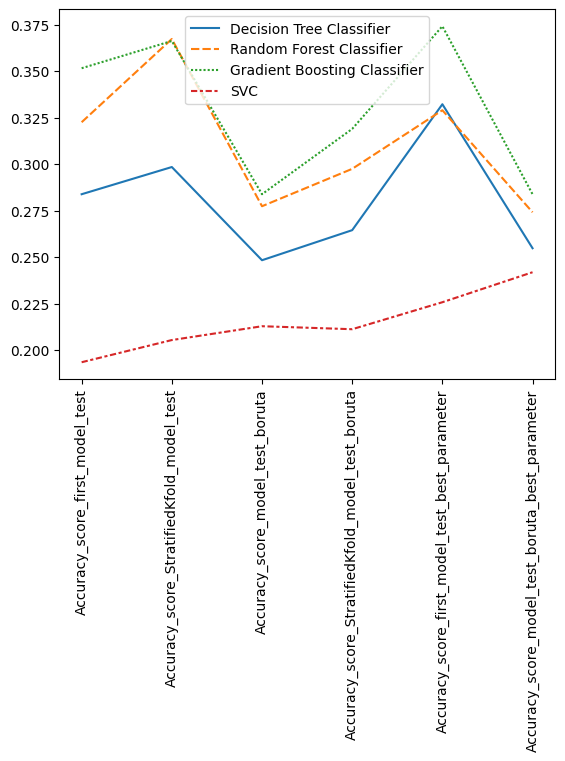

In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {
              'Accuracy_score_first_model_test' : test_result_first_model, #'Accuracy_score_first_model_train' : train_result_first_model,
              'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, #'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold,
              'Accuracy_score_model_test_boruta' : test_result_boruta, #'Accuracy_score_model_train_boruta' : train_result_boruta,
              'Accuracy_score_StratifiedKfold_model_test_boruta' : test_result_skfold_boruta, #'Accuracy_score_StratifiedKfold_model_train_boruta' : train_result_skfold_boruta,
              'Accuracy_score_first_model_test_best_parameter' : test_result_best_par, #'Accuracy_score_first_model_train_best_parameter' : train_result_best_par,
               'Accuracy_score_model_test_boruta_best_parameter' : test_result_boruta_best_par,
              }
test2 = pd.DataFrame(index = index_result, data = data_result)
test2.head()
sns.lineplot(test2.T)
plt.xticks(rotation = 90)

#### Joining the StratifiedKfold selection and best parameters

##### Including all the features 

In [ ]:
#_skf means that this model will use the StratifiedKfold
dstree_best_par_skf = DecisionTreeClassifier(random_state = 999, criterion = 'gini', max_depth = 16, min_samples_leaf = 4).fit(X_train, y_train)
rf_best_par_skf = RandomForestClassifier(random_state = 999, max_depth = 10, min_samples_leaf = 3, n_estimators = 50).fit(X_train, y_train)
gb_best_par_skf = GradientBoostingClassifier(random_state = 999, learning_rate = 0.4, min_samples_leaf = 4, n_estimators = 90).fit(X_train, y_train)
svc_best_par_skf = SVC(random_state = 999, C = 15, class_weight = None).fit(X_train, y_train)

models_best_par_skf = [dstree_best_par_skf, rf_best_par_skf, gb_best_par_skf, svc_best_par_skf]

skf_best_par = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 999)
# lst_accu_stratifiedKfold_test = []
# lst_accu_stratifiedKfold_train = []

test_result_skfold_best_par = []
train_result_skfold_best_par = []

for i in models_best_par_skf:
    lst_accu_stratifiedKfold_test = []
    lst_accu_stratifiedKfold_train = []
    for train_index , test_index in skf_best_par.split(X2, y2):
        X_train_fold, X_test_fold = X2[train_index], X2[test_index]
        y_train_fold, y_test_fold = y2[train_index], y2[test_index]
        
        i.fit(X_train_fold, y_train_fold)
        #print("score: ", dstree.score(X_test_fold, y_test_fold ))
        lst_accu_stratifiedKfold_test.append(i.score(X_test_fold, y_test_fold ))
        lst_accu_stratifiedKfold_train.append(i.score(X_train_fold, y_train_fold ))
    
    print("Accuracy for models: ")
    test_result_skfold_best_par.append(np.array(lst_accu_stratifiedKfold_test).mean().max())
    train_result_skfold_best_par.append(np.array(lst_accu_stratifiedKfold_train).mean().max())
    
    print(np.array(lst_accu_stratifiedKfold_test).mean().max(), " model test ", i)
    print(np.array(lst_accu_stratifiedKfold_train).mean().max(), " model train ", i)

Accuracy for models: 
0.300440466041489  model test  DecisionTreeClassifier(max_depth=16, min_samples_leaf=4, random_state=999)
0.5853427437597757  model train  DecisionTreeClassifier(max_depth=16, min_samples_leaf=4, random_state=999)
Accuracy for models: 
0.3575021312872976  model test  RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=999)
0.6996132130889953  model train  RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=999)
Accuracy for models: 
0.3624183006535947  model test  GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=4,
                           n_estimators=90, random_state=999)
0.9982005001084383  model train  GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=4,
                           n_estimators=90, random_state=999)
Accuracy for models: 
0.2394430235862461  model test  SVC(C=15, random_state=999)
0.34025442047313526  m

In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {
              'Accuracy_score_first_model_test' : test_result_first_model, 'Accuracy_score_first_model_train' : train_result_first_model,
              'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, 'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold,
              'Accuracy_score_model_test_boruta' : test_result_boruta, 'Accuracy_score_model_train_boruta' : train_result_boruta,
              'Accuracy_score_StratifiedKfold_model_test_boruta' : test_result_skfold_boruta, 'Accuracy_score_StratifiedKfold_model_train_boruta' : train_result_skfold_boruta,
              'Accuracy_score_first_model_test_best_parameter' : test_result_best_par, 'Accuracy_score_first_model_train_best_parameter' : train_result_best_par,
              'Accuracy_score_model_test_boruta_best_parameter' : test_result_boruta_best_par, 'Accuracy_score_model_train_boruta_best_parameter' : train_result_boruta_best_par,
              'Accuracy_score_StratifiedKfold_model_test_best_parameter': test_result_skfold_best_par, 'Accuracy_score_StratifiedKfold_model_train_best_parameter' : train_result_skfold_best_par,
              }
Results_DF = pd.DataFrame(index = index_result, data = data_result)
Results_DF.head()

Accuracy_score_first_model_test  \
Decision Tree Classifier                             0.283871   
Random Forest Classifier                             0.322581   
Gradient Boosting Classifier                         0.351613   
SVC                                                  0.193548   

                              Accuracy_score_first_model_train  \
Decision Tree Classifier                              1.000000   
Random Forest Classifier                              1.000000   
Gradient Boosting Classifier                          0.958449   
SVC                                                   0.249307   

                              Accuracy_score_StratifiedKfold_model_test  \
Decision Tree Classifier                                       0.298494   
Random Forest Classifier                                       0.367334   
Gradient Boosting Classifier                                   0.366269   
SVC                                                            0.205470   

                              Accuracy_score_StratifiedKfold_model_train  \
Decision Tree Classifier                                        0.998201   
Random Forest Classifier                                        0.998201   
Gradient Boosting Classifier                                    0.889949   
SVC                                                             0.250554   

                              Accuracy_score_model_test_boruta  \
Decision Tree Classifier                              0.248387   
Random Forest Classifier                              0.277419   
Gradient Boosting Classifier                          0.283871   
SVC                                                   0.212903   

                              Accuracy_score_model_train_boruta  \
Decision Tree Classifier                               0.993075   
Random Forest Classifier                               0.993075   
Gradient Boosting Classifier                           0.904432   
SVC                                                    0.250693   

                              Accuracy_score_StratifiedKfold_model_test_boruta  \
Decision Tree Classifier                                              0.264550   
Random Forest Classifier                                              0.297513   
Gradient Boosting Classifier                                          0.318997   
SVC                                                                   0.211296   

                              Accuracy_score_StratifiedKfold_model_train_boruta  \
Decision Tree Classifier                                               0.992456   
Random Forest Classifier                                               0.992456   
Gradient Boosting Classifier                                           0.840532   
SVC                                                                    0.258167   

                              Accuracy_score_first_model_test_best_parameter  \
Decision Tree Classifier                                            0.332258   
Random Forest Classifier                                            0.329032   
Gradient Boosting Classifier                                        0.374194   
SVC                                                                 0.225806   

                              Accuracy_score_first_model_train_best_parameter  \
Decision Tree Classifier                                             0.590028   
Random Forest Classifier                                             0.739612   
Gradient Boosting Classifier                                         1.000000   
SVC                                                                  0.361496   

                              Accuracy_score_model_test_boruta_best_parameter  \
Decision Tree Classifier                                             0.254839   
Random Forest Classifier                                             0.274194   
Gradient Boosting Classifier                                         0.2

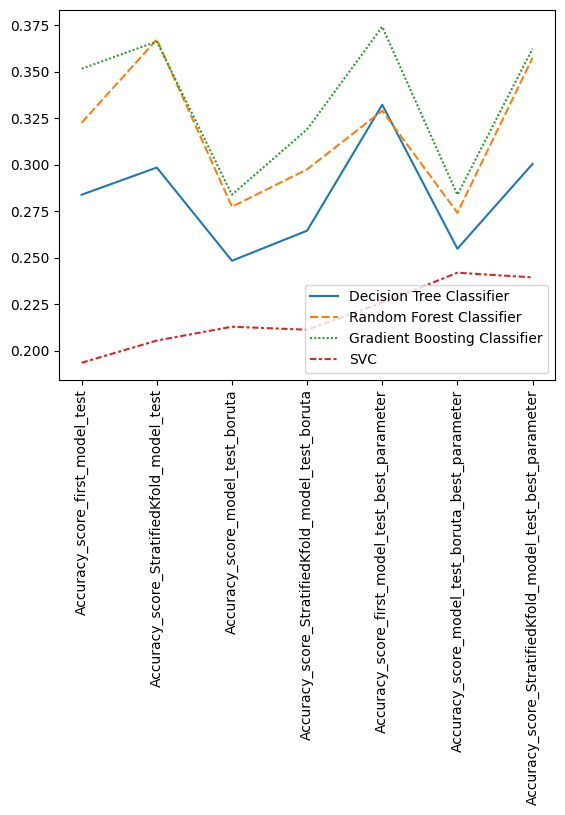

In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {
              'Accuracy_score_first_model_test' : test_result_first_model, #'Accuracy_score_first_model_train' : train_result_first_model,
              'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, #'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold,
              'Accuracy_score_model_test_boruta' : test_result_boruta, #'Accuracy_score_model_train_boruta' : train_result_boruta,
              'Accuracy_score_StratifiedKfold_model_test_boruta' : test_result_skfold_boruta, #'Accuracy_score_StratifiedKfold_model_train_boruta' : train_result_skfold_boruta,
              'Accuracy_score_first_model_test_best_parameter' : test_result_best_par, #'Accuracy_score_first_model_train_best_parameter' : train_result_best_par,
              'Accuracy_score_model_test_boruta_best_parameter' : test_result_boruta_best_par, #'Accuracy_score_model_train_boruta_best_parameter' : train_result_boruta_best_par,
              'Accuracy_score_StratifiedKfold_model_test_best_parameter': test_result_skfold_best_par, #'Accuracy_score_StratifiedKfold_model_train_best_parameter' : train_result_skfold_best_par,
              }
df3 = pd.DataFrame(index = index_result, data = data_result)
sns.lineplot(df3.T)
plt.xticks(rotation = 90)
plt.legend(loc = "best")

#### Using features after boruta algorithm

In [ ]:
dstree_b_best_par_skf = DecisionTreeClassifier(random_state = 999, criterion = 'gini', max_depth = 15, min_samples_leaf = 2).fit(X_train_b, y_train_b)
rf_b_best_par_skf = RandomForestClassifier(random_state = 999, max_depth = 11, min_samples_leaf = 2, n_estimators = 70).fit(X_train_b, y_train_b)
gb_b_best_par_skf = GradientBoostingClassifier(random_state = 999, learning_rate = 0.4, min_samples_leaf = 2, n_estimators = 90).fit(X_train_b, y_train_b)
svc_b_best_par_skf = SVC(random_state = 999, C = 92, class_weight = None).fit(X_train_b, y_train_b)

models_bor_best_par_skf = [dstree_b_best_par_skf, rf_b_best_par_skf, gb_b_best_par_skf, svc_b_best_par_skf]

skf_b_best_par_skf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 999)


test_result_skfold_boruta_best_par_skf = []
train_result_skfold_boruta_best_par_skf = []

for i in models_bor_best_par_skf:
    lst_accu_stratifiedKfold_test_boruta_best_par_skf = []
    lst_accu_stratifiedKfold_train_boruta_best_par_skf = []
    for train_index , test_index in skf_b_best_par_skf.split(X3, y3):
        X_train_fold, X_test_fold = X3[train_index], X3[test_index]
        y_train_fold, y_test_fold = y3[train_index], y3[test_index]
        
        i.fit(X_train_fold, y_train_fold)
        #print("score: ", dstree.score(X_test_fold, y_test_fold ))
        lst_accu_stratifiedKfold_test_boruta_best_par_skf.append(i.score(X_test_fold, y_test_fold ))
        lst_accu_stratifiedKfold_train_boruta_best_par_skf.append(i.score(X_train_fold, y_train_fold ))
    
    print("Accuracy for models: ")
    test_result_skfold_boruta_best_par_skf.append(np.array(lst_accu_stratifiedKfold_test_boruta_best_par_skf).mean().max())
    train_result_skfold_boruta_best_par_skf.append(np.array(lst_accu_stratifiedKfold_train_boruta_best_par_skf).mean().max())
    
    print(np.array(lst_accu_stratifiedKfold_test_boruta_best_par_skf).mean().max(), " model test ", i)
    print(np.array(lst_accu_stratifiedKfold_train_boruta_best_par_skf).mean().max(), " model train ", i)

Accuracy for models: 
0.2567774936061381  model test  DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=999)
0.6096983981305538  model train  DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=999)
Accuracy for models: 
0.29069337880079565  model test  RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=70,
                       random_state=999)
0.7254284745830873  model train  RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=70,
                       random_state=999)
Accuracy for models: 
0.30633702756464903  model test  GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=2,
                           n_estimators=90, random_state=999)
0.9924558599006965  model train  GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=2,
                           n_estimators=90, random_state=999)
Accuracy for models: 
0.24423131571469173  model test  SVC(C=92, random_state=999)
0.4595796905991965

In [ ]:
index_result = ["Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "SVC"]
data_result = {
              'Accuracy_score_first_model_test' : test_result_first_model, 'Accuracy_score_first_model_train' : train_result_first_model,
              'Accuracy_score_StratifiedKfold_model_test' : test_result_skfold, 'Accuracy_score_StratifiedKfold_model_train' : train_result_skfold,
              'Accuracy_score_model_test_boruta' : test_result_boruta, 'Accuracy_score_model_train_boruta' : train_result_boruta,
              'Accuracy_score_StratifiedKfold_model_test_boruta' : test_result_skfold_boruta, 'Accuracy_score_StratifiedKfold_model_train_boruta' : train_result_skfold_boruta,
              'Accuracy_score_first_model_test_best_parameter' : test_result_best_par, 'Accuracy_score_first_model_train_best_parameter' : train_result_best_par,
              'Accuracy_score_model_test_boruta_best_parameter' : test_result_boruta_best_par, 'Accuracy_score_model_train_boruta_best_parameter' : train_result_boruta_best_par,
              'Accuracy_score_StratifiedKfold_model_test_best_parameter': test_result_skfold_best_par, 'Accuracy_score_StratifiedKfold_model_train_best_parameter' : train_result_skfold_best_par,
              'Accuracy_score_StratifiedKfold_model_test_boruta_best_parameter' :test_result_skfold_boruta_best_par_skf, 'Accuracy_score_StratifiedKfold_model_train_boruta_best_parameter' :train_result_skfold_boruta_best_par_skf,
              }
Results_DF = pd.DataFrame(index = index_result, data = data_result)
Results_DF.head()

Accuracy_score_first_model_test  \
Decision Tree Classifier                             0.283871   
Random Forest Classifier                             0.322581   
Gradient Boosting Classifier                         0.351613   
SVC                                                  0.193548   

                              Accuracy_score_first_model_train  \
Decision Tree Classifier                              1.000000   
Random Forest Classifier                              1.000000   
Gradient Boosting Classifier                          0.958449   
SVC                                                   0.249307   

                              Accuracy_score_StratifiedKfold_model_test  \
Decision Tree Classifier                                       0.298494   
Random Forest Classifier                                       0.367334   
Gradient Boosting Classifier                                   0.366269   
SVC                                                            0.205470   

                              Accuracy_score_StratifiedKfold_model_train  \
Decision Tree Classifier                                        0.998201   
Random Forest Classifier                                        0.998201   
Gradient Boosting Classifier                                    0.889949   
SVC                                                             0.250554   

                              Accuracy_score_model_test_boruta  \
Decision Tree Classifier                              0.248387   
Random Forest Classifier                              0.277419   
Gradient Boosting Classifier                          0.283871   
SVC                                                   0.212903   

                              Accuracy_score_model_train_boruta  \
Decision Tree Classifier                               0.993075   
Random Forest Classifier                               0.993075   
Gradient Boosting Classifier                           0.904432   
SVC                                                    0.250693   

                              Accuracy_score_StratifiedKfold_model_test_boruta  \
Decision Tree Classifier                                              0.264550   
Random Forest Classifier                                              0.297513   
Gradient Boosting Classifier                                          0.318997   
SVC                                                                   0.211296   

                              Accuracy_score_StratifiedKfold_model_train_boruta  \
Decision Tree Classifier                                               0.992456   
Random Forest Classifier                                               0.992456   
Gradient Boosting Classifier                                           0.840532   
SVC                                                                    0.258167   

                              Accuracy_score_first_model_test_best_parameter  \
Decision Tree Classifier                                            0.332258   
Random Forest Classifier                                            0.329032   
Gradient Boosting Classifier                                        0.374194   
SVC                                                                 0.225806   

                              Accuracy_score_first_model_train_best_parameter  \
Decision Tree Classifier                                             0.590028   
Random Forest Classifier                                             0.739612   
Gradient Boosting Classifier                                         1.000000   
SVC                                                                  0.361496   

                              Accuracy_score_model_test_boruta_best_parameter  \
Decision Tree Classifier                                             0.254839   
Random Forest Classifier                                             0.274194   
Gradient Boosting Classifier                                         0.2

Text(0.5, 1.0, 'Accuracy for Test by Models')

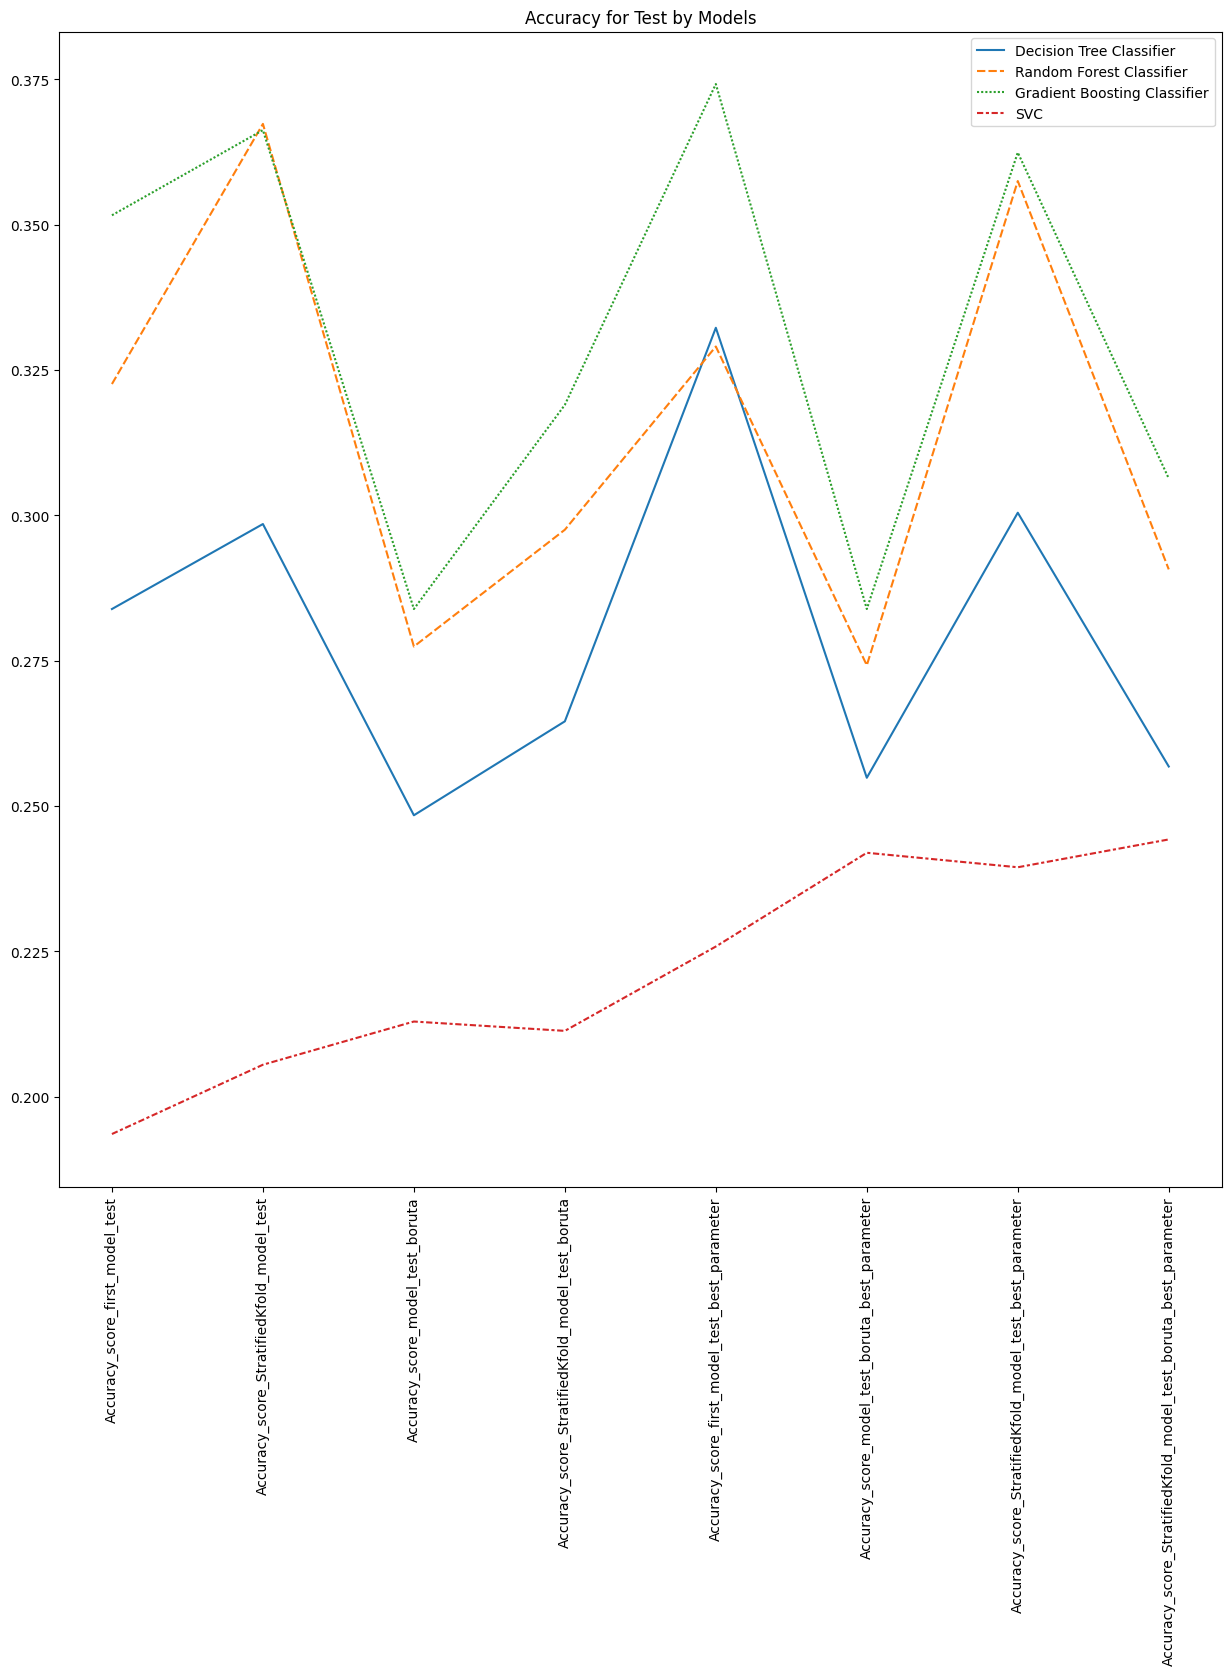

In [ ]:
Results_DF_Test = Results_DF[['Accuracy_score_first_model_test',
                            'Accuracy_score_StratifiedKfold_model_test',
                            'Accuracy_score_model_test_boruta',
                            'Accuracy_score_StratifiedKfold_model_test_boruta',
                            'Accuracy_score_first_model_test_best_parameter',
                            'Accuracy_score_model_test_boruta_best_parameter',
                            'Accuracy_score_StratifiedKfold_model_test_best_parameter',
                            'Accuracy_score_StratifiedKfold_model_test_boruta_best_parameter']]
Results_DF_Test.head()
plt.figure(figsize = (15, 15))
sns.lineplot(Results_DF_Test.T)
plt.xticks(rotation = 90)
plt.title("Accuracy for Test by Models")

Text(0.5, 1.0, 'Accuracy for Training by Model')

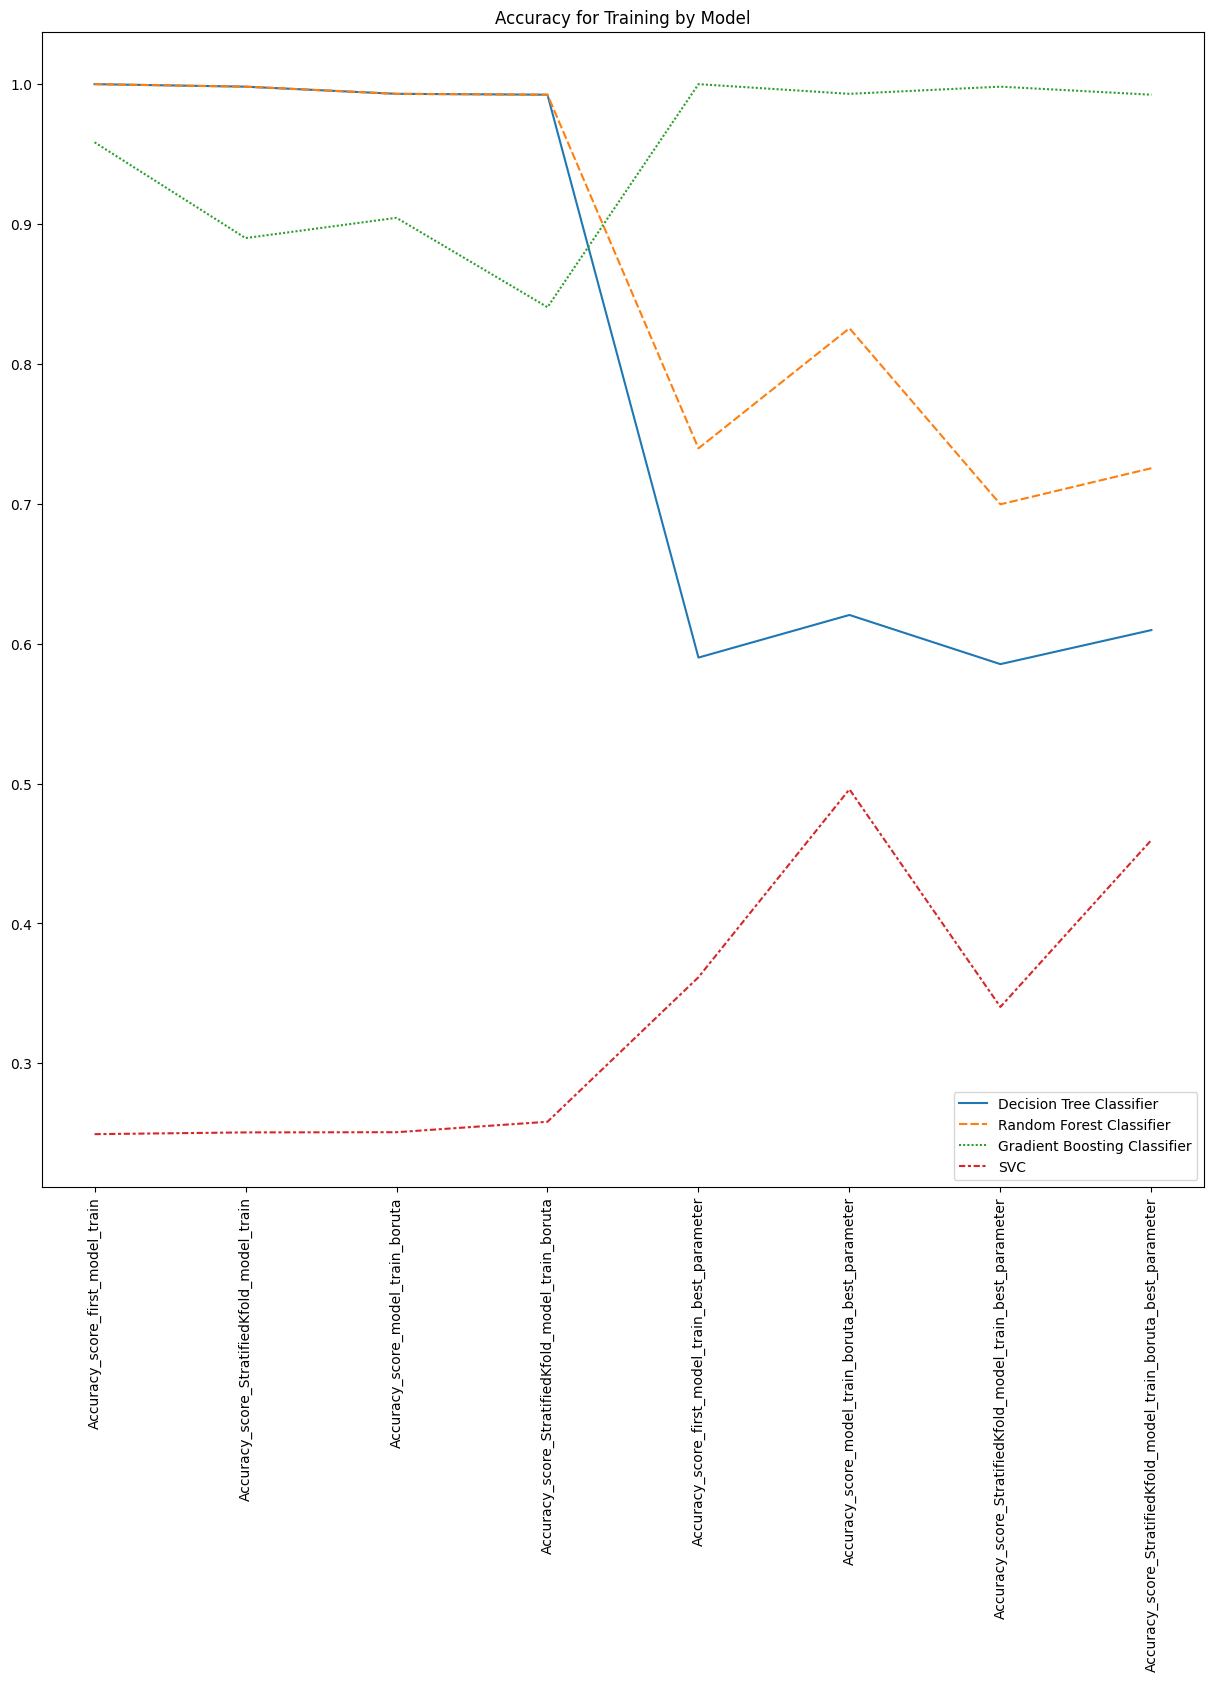

In [ ]:
Results_DF_Train = Results_DF[['Accuracy_score_first_model_train',
                            'Accuracy_score_StratifiedKfold_model_train',
                            'Accuracy_score_model_train_boruta',
                            'Accuracy_score_StratifiedKfold_model_train_boruta',
                            'Accuracy_score_first_model_train_best_parameter',
                            'Accuracy_score_model_train_boruta_best_parameter',
                            'Accuracy_score_StratifiedKfold_model_train_best_parameter',
                            'Accuracy_score_StratifiedKfold_model_train_boruta_best_parameter']]
Results_DF_Train.head()
plt.figure(figsize = (15, 15))
sns.lineplot(Results_DF_Train.T)
plt.xticks(rotation = 90)
plt.title("Accuracy for Training by Model")
#Checking the accuracy for training 

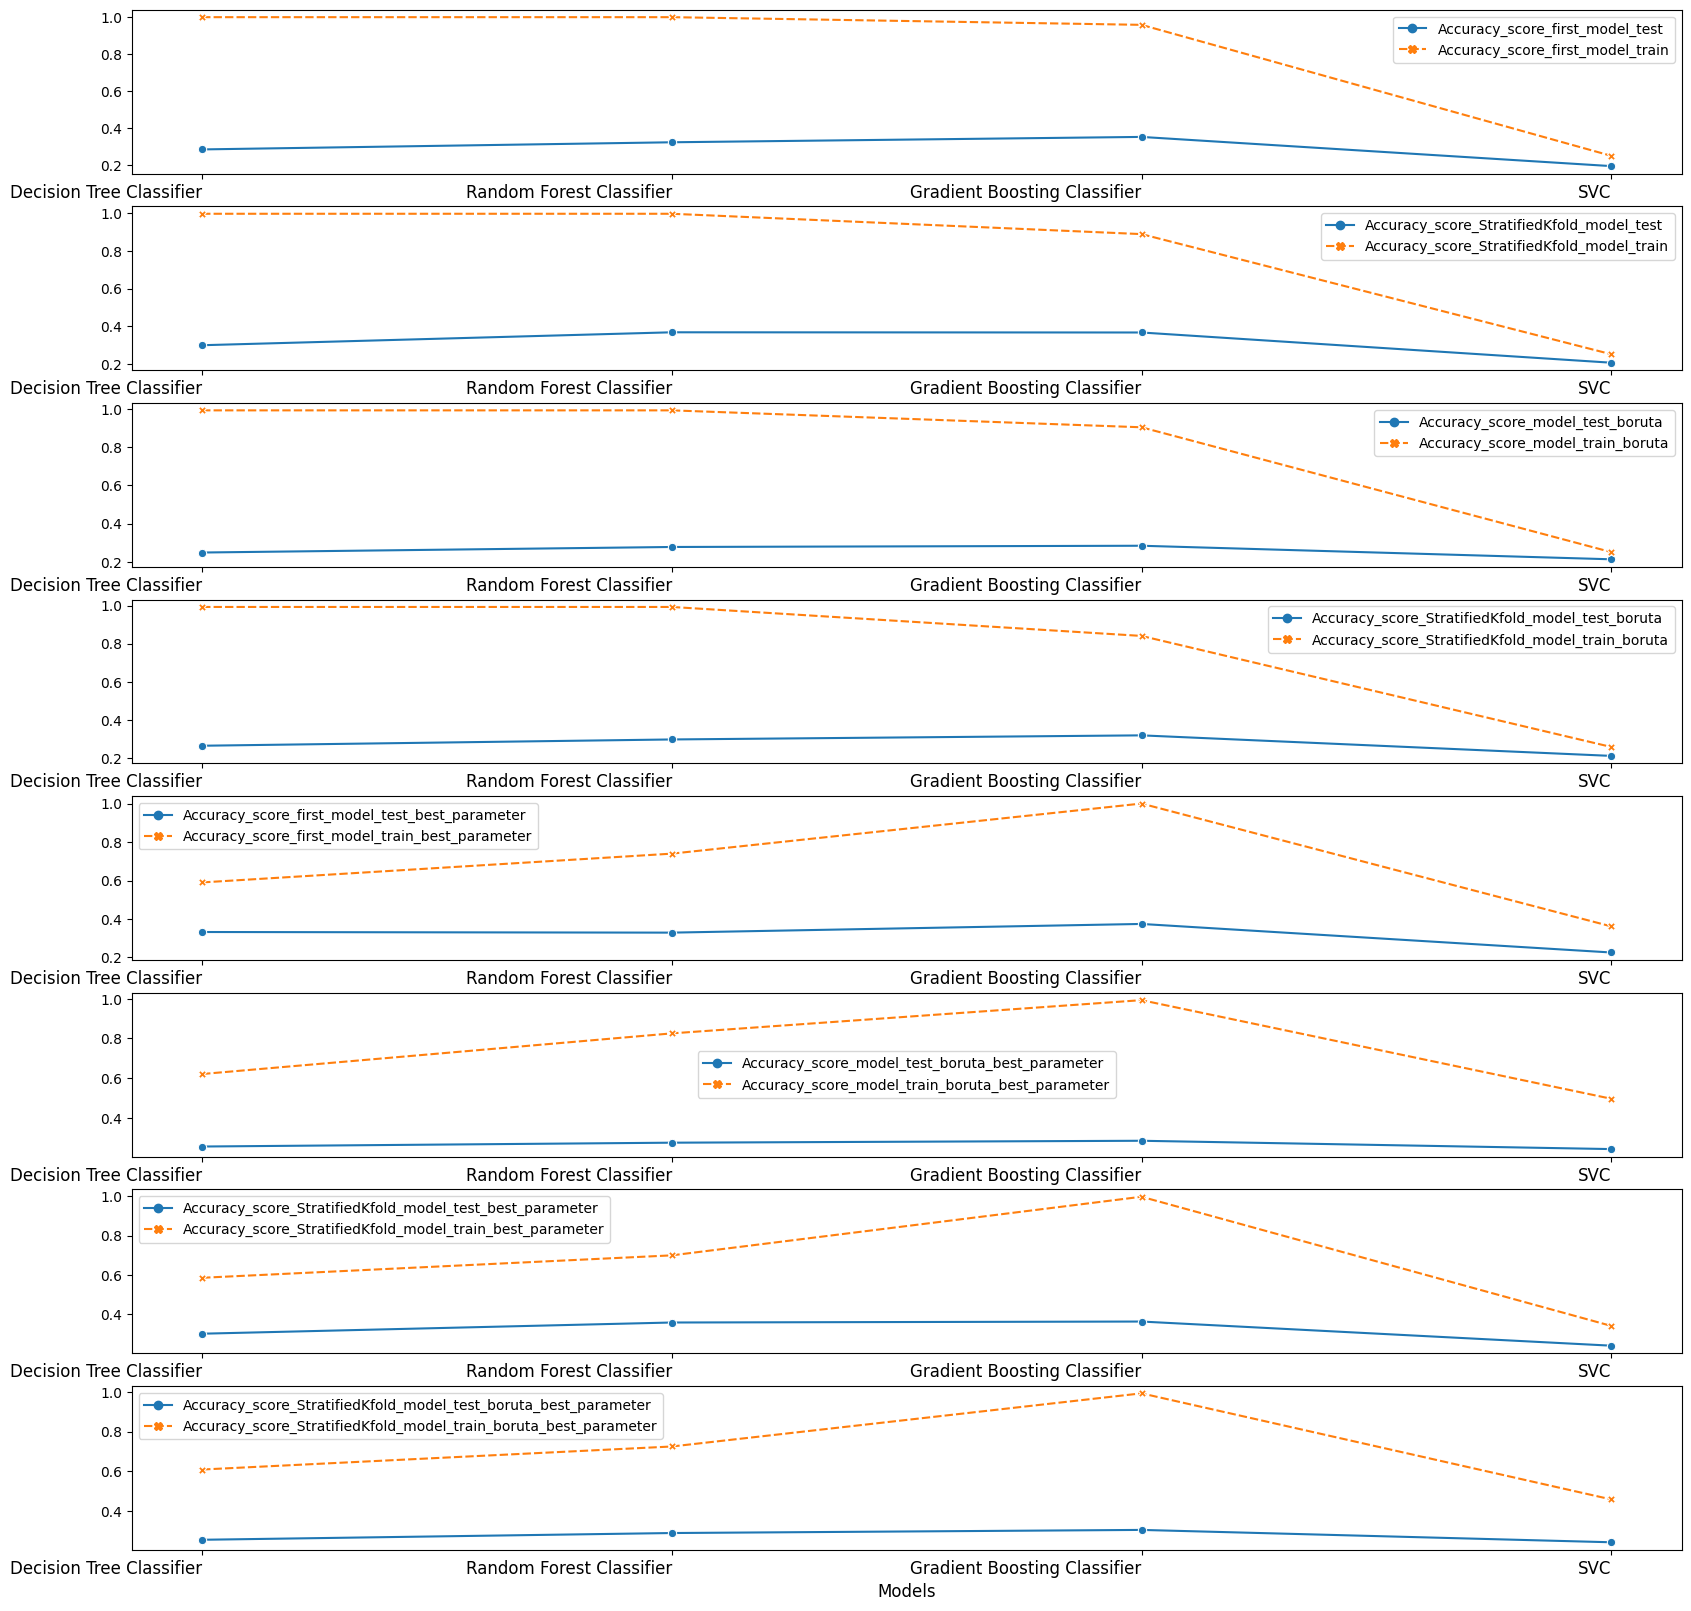

In [ ]:
lista = [["Accuracy_score_first_model_test", "Accuracy_score_first_model_train"], ["Accuracy_score_StratifiedKfold_model_test", "Accuracy_score_StratifiedKfold_model_train"],
         ["Accuracy_score_model_test_boruta", "Accuracy_score_model_train_boruta"], ["Accuracy_score_StratifiedKfold_model_test_boruta", "Accuracy_score_StratifiedKfold_model_train_boruta"],
         ["Accuracy_score_first_model_test_best_parameter", "Accuracy_score_first_model_train_best_parameter"], ["Accuracy_score_model_test_boruta_best_parameter", "Accuracy_score_model_train_boruta_best_parameter"],
         ["Accuracy_score_StratifiedKfold_model_test_best_parameter", "Accuracy_score_StratifiedKfold_model_train_best_parameter"], ["Accuracy_score_StratifiedKfold_model_test_boruta_best_parameter", "Accuracy_score_StratifiedKfold_model_train_boruta_best_parameter"]]
plt.figure(figsize = (20,20))
for i in range(0,len(lista)):
    plt.subplot(8,1,i+1)
    df1 = Results_DF.loc[:, lista[i]]
    line = sns.lineplot(data = df1, markers=True)
    plt.xticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')
    plt.xlabel('Models',size=12)
#Verificando a diferência da acurácia para cada modelo


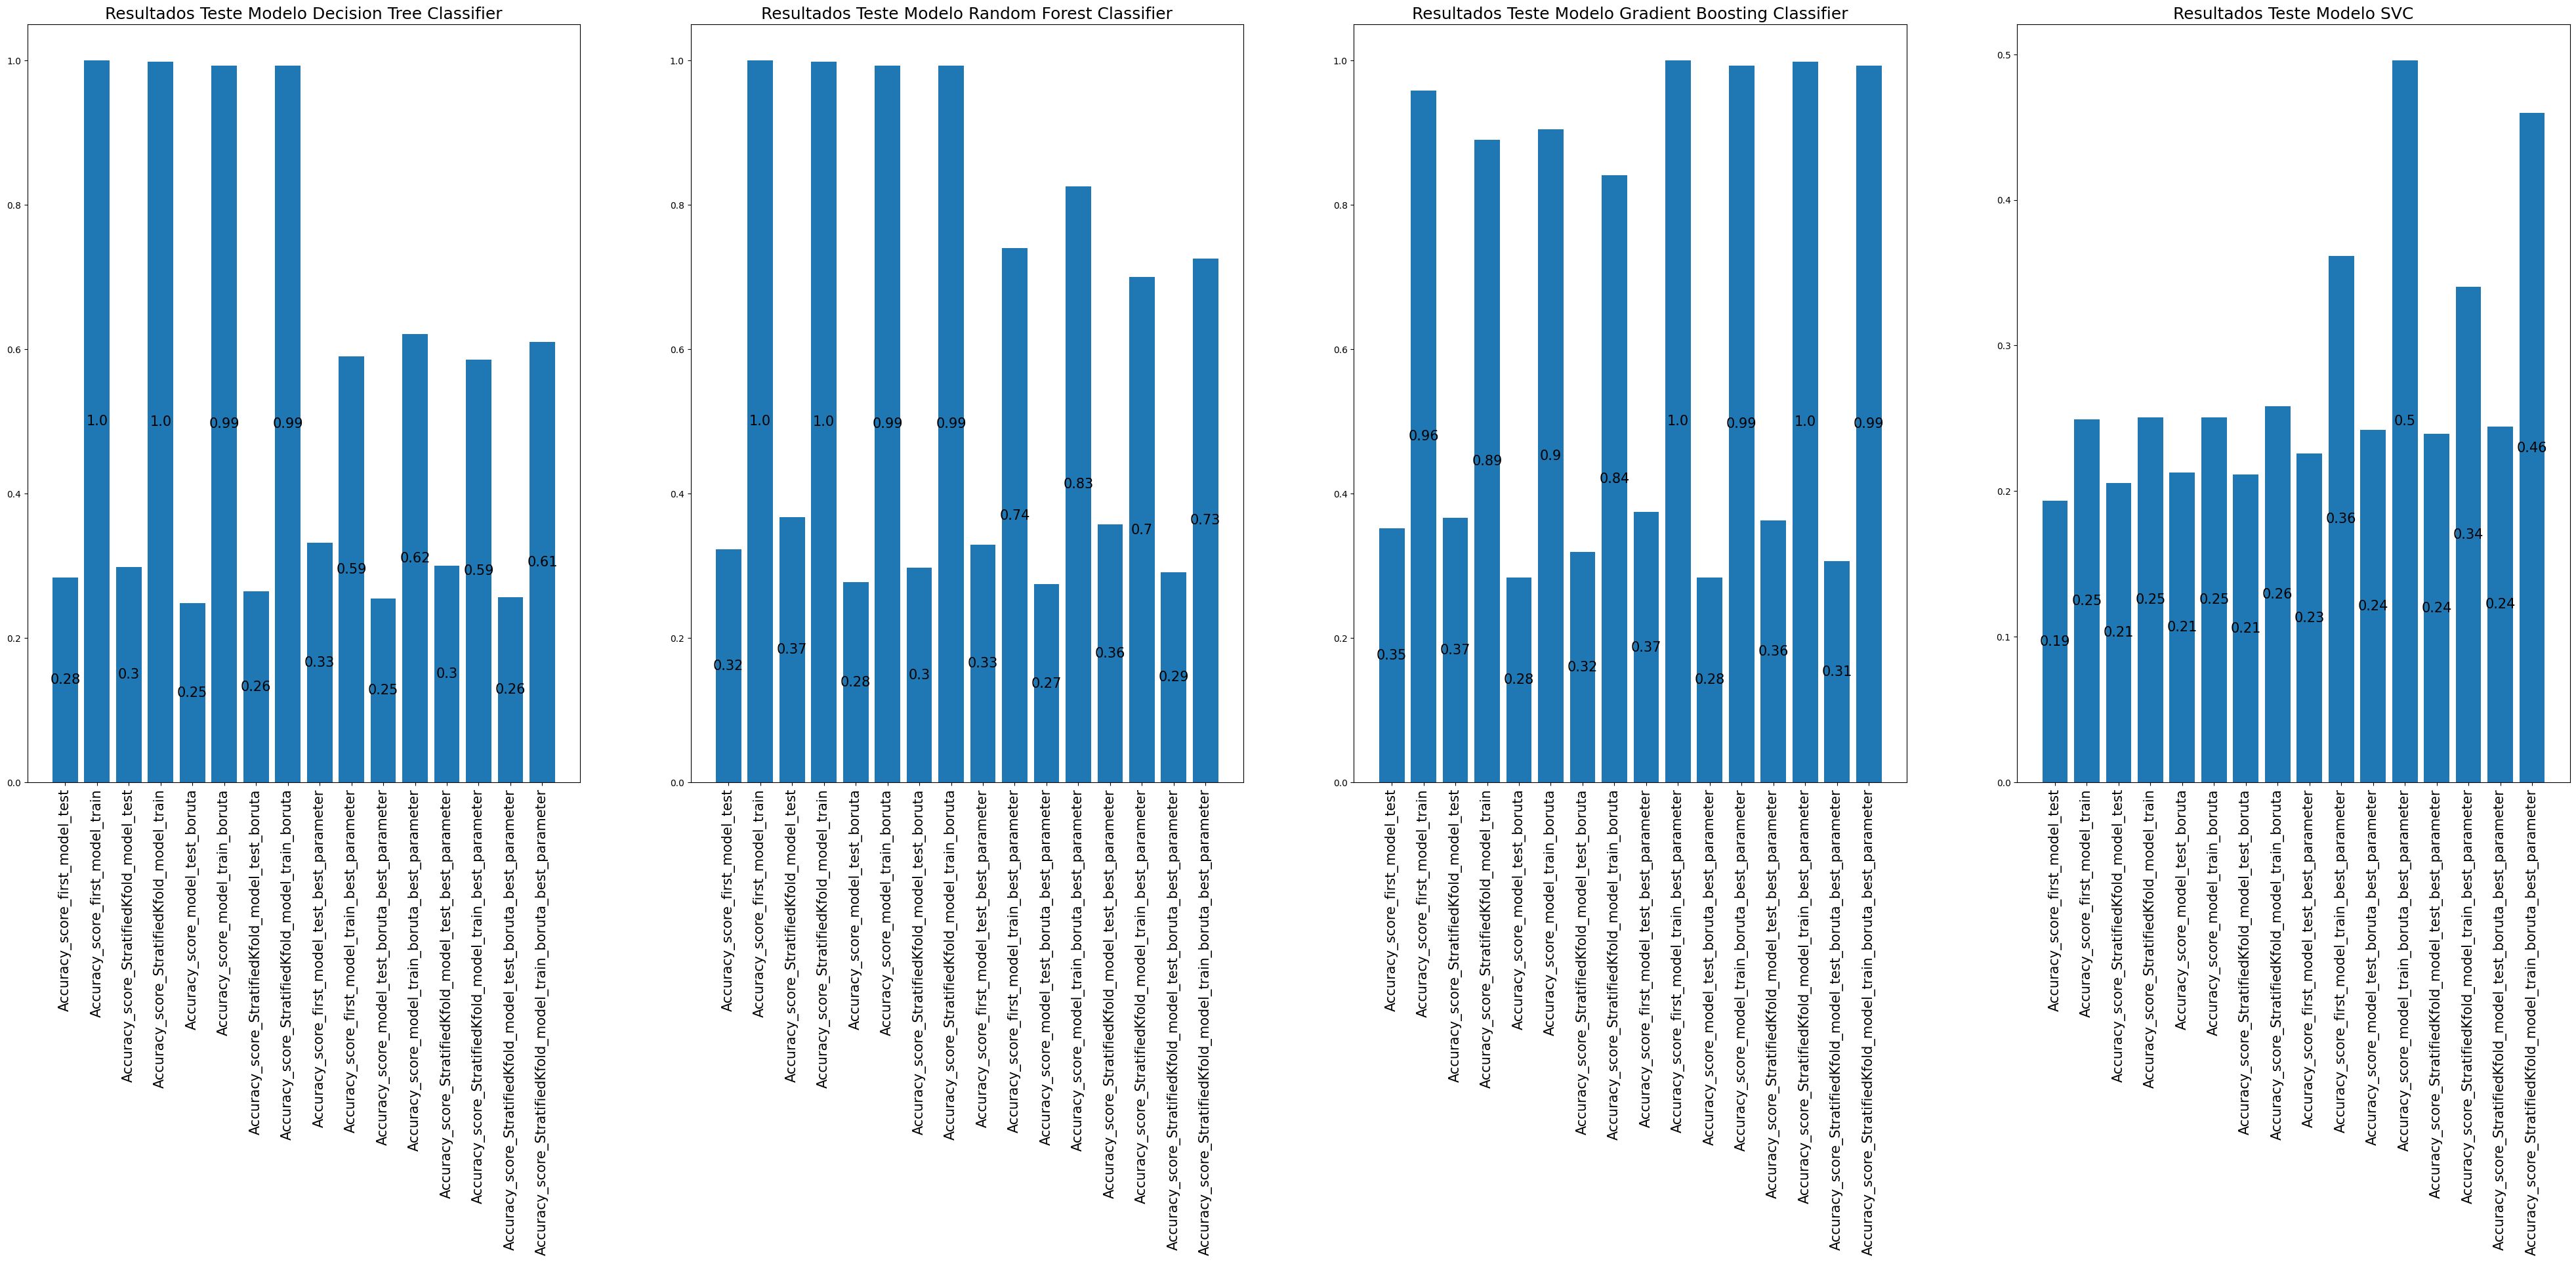

In [ ]:
ind = ["Decision Tree Classifier", "Random Forest Classifier","Gradient Boosting Classifier", "SVC"]
n = 1
plt.figure( figsize =  (50, 15))
for i in ind:
    plt.subplot(1, 4, n)
    barp = plt.bar(height = Results_DF.loc[i,:].values, x = Results_DF.loc[i,:].index)
    plt.bar_label(barp, labels = round(pd.DataFrame(Results_DF.loc[i,:].values)[0],2), label_type = "center", fontsize = 15)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.title("Resultados Teste " + "Modelo " + i, fontsize = 18)
    n += 1

#### Metrics for "best model"

Now we will see some metrics for the model selected

Model selected : First_Model_Best_Parameter - > Decision Tree Classifier

In [ ]:
X = data.drop(labels = "Generation", axis = "columns")   #Features
y = data["Generation"] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)

In [ ]:
dstree_best_par = DecisionTreeClassifier(random_state = 999, criterion = 'gini', max_depth = 16, min_samples_leaf = 4).fit(X_train, y_train)
predictions_test =  dstree_best_par.predict(X_test)
predictions_train = dstree_best_par.predict(X_train)

[[21  3  4  2 10  0  3  2]
 [ 9  1  3  2  5  0  0  3]
 [10  3  7  3 16  2  2  3]
 [ 3  1  7  5 12  3  3  4]
 [ 8  2  7  3 25  1  2  3]
 [ 5  0  3  0  5 20  2  1]
 [ 6  1  3  0  2  2 11  4]
 [ 7  3  4  3  8  3  1 13]]


c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


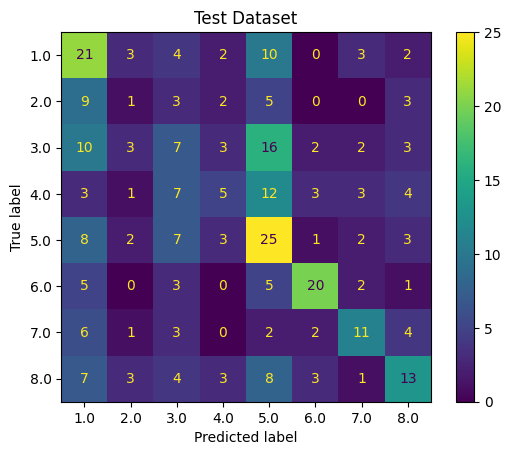

In [ ]:
print(metrics.confusion_matrix(y_test, predictions_test))

metrics.plot_confusion_matrix(dstree_best_par, X_test, y_test)
plt.title("Test Dataset")
plt.show()

[[69  4  2  3 17  3  4  4]
 [14 28  7  5 20  1  2  0]
 [10  5 54  3 12  2  2  4]
 [ 9  4  3 37 19  1  2  3]
 [12  4  5  5 81  0  1  4]
 [ 3  4  1  2 11 71  4  1]
 [ 4  5  9  0 10  2 51  6]
 [ 6  1  3  3 16  2  7 35]]


c:\Users\alvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


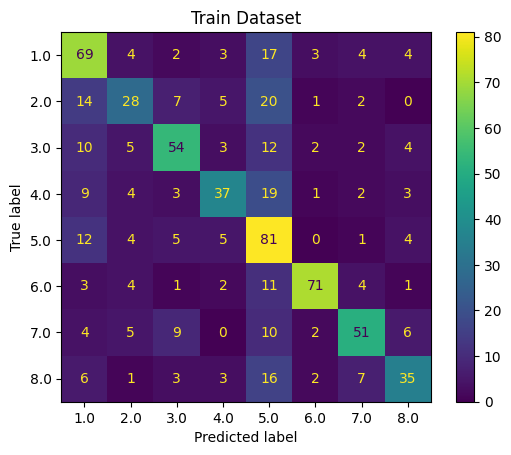

In [ ]:
print(metrics.confusion_matrix(y_train, predictions_train))

metrics.plot_confusion_matrix(dstree_best_par, X_train, y_train)
plt.title("Train Dataset")
plt.show()

In [ ]:
acur_test = metrics.accuracy_score(y_test, predictions_test)
acur_train = metrics.accuracy_score(y_train, predictions_train)

print(f"Accuracy of the classifier for test is: {acur_test}")
print(f"Accuracy of the classifier for train is: {acur_train}")

Accuracy of the classifier for test is: 0.33225806451612905
Accuracy of the classifier for train is: 0.590027700831025


Text(0.5, 1.0, 'Accuracy for the model')

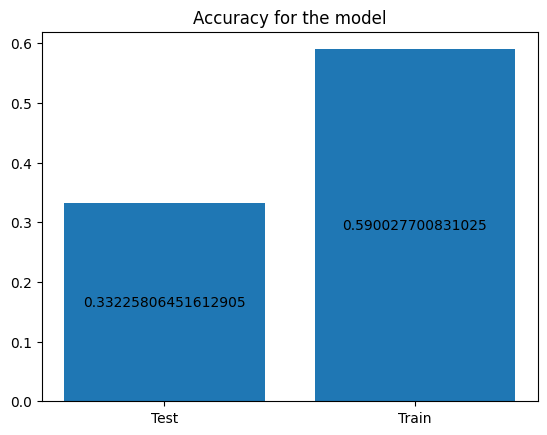

In [ ]:
results = {'Test' : acur_test, 'Train' : acur_train}
grap = pd.DataFrame(results, index = ['Test', 'Train'])
grapp = plt.bar(height = grap.iloc[0,:].values, x = grap.iloc[0,:].index)
plt.bar_label(grapp, labels = grap.iloc[0,:].values, label_type = "center")
plt.title("Accuracy for the model")

Text(0.5, 1.0, 'Precision for Generations')

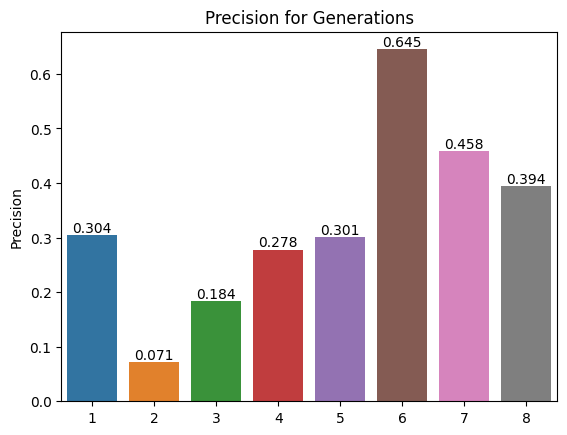

In [ ]:
#Precision
prec = metrics.precision_score(y_test, predictions_test, average = None)
prec_df = pd.DataFrame(prec, index = range(1,9))
prec_df.rename({0 : "Precision"}, axis = "columns", inplace = True)
ax = sns.barplot(y = prec_df["Precision"], x = prec_df.index)
for i, v in enumerate(round(prec_df["Precision"],3)):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.title("Precision for Generations")